# [Draft] **Workbook for the study of coordinated reset in a simulation of subthalamic nucleus**

## Author Informtation
This work was performed by Matteo Coscia(1), Jesse Gilmer(1), Ali Khaledi-Nasab(2), and Mazen Al Borno(1).

1.   University of Colorado, School of Medicine - Computer Science and Bioengineering, and Computational Biology
2.   Amazon - Amazon Web Services Network Capacity Team.

The following is a work in progress. Contact J. Gilmer for queries at: jesse dot gilmer at cuanschutz dot edu.

To Do:
* Results text.
* Rework plotting functions.
* Integrate Matteo's work into Results.
* Make a spatial connectivity function.
* Do research into STN connectivity and projection anatomy.
* Make an RL agent for frequency and sites.




# Abstract


Abnormal synchrony in the subthalamic nucleus is thought to be an intermediate etiology in Parkinson's disease symptomology. The application of high-frequency stimulation through implanted deep brain stimulators is thought to offset or interrupt aberrant outputs of the neural structures impacted by Parkinson's. However, high frequency stimulation has a number of off-target effects that can severely impact the quality of life for patients receiving this therapy, neccessitating alternatives. Research into therapies that treat the disease state of Parkinson's while reducing side effects have shown that random patterned stimulations, termed coordinated reset, can be effective in treating Parkinson's without relying on high frequency stimulation, thereby reducing negative effects of the therapy. This therapy is also thought to be an improvement over high-frequency stimualtion because the duration of its beneficial effects persists for longer than traditional stimuli. Interestingly, coordinated reset can also be applied through peripheral stimulation of the fingers, presumably by altering the statistics of inputs to the subthalamic nucleus through an ascending sensory pathway. While this therapy has been somewhat successful in small clinical trials, it remains unclear what the optimal stimulus patterning should be to best alleviate Parkinsonian symptoms. Here, we reestablish a computational model previously used to test stimulation patterns in peripheral coordinated reset and test a wide range of potential stimulation parameters to assay their effect on changes to connectivity weighting and synchrony, and find that low frequency stimuli across a moderate number of tactile sites best reduces abnormal synchrony in the system. Building upon this, we applied a reinforcement learning approach to parameter selection and found [something]. Additionally, we explore the effect of stimulation site selection by examining the effect of stimualting targets whose neural representation is relatively proximal vs those that are represented distally within the subthalamic nucleus and found [something]. The outcomes from this modelling approach can help clinicians to select the best course for treating Parkinson's disease, and other diseases of abnormal neural synchrony, using non-invasive peripheral therapies.

__NOTES TO SELF (TONY)__
- High freq stimulation DBS offset or interrupt aberrant outputs of the neural structures impacted by Parkinson's.
- Random patterned stimulations (coordinated reset) without relying on high freq stimulation.
- Random patterned stimulation (coordinated reset) have longer persistence of positive effect.
- Coordinated reset can be applied through peripheral stimulation of the fingers by "altering the statistics of input to the STN through ascending sensory pathway."
- Optimal stimulus patterning 
- Computational model to test stimulation pattern and assay their effect on changes to connectivity weighting and synchrony.
- Low frequency stimuli across a moderate number of tactile sites best reduce absnormal synchrony in the system.
- Reinforcement learning appraoch to parameter selection and found ...
- Effect of stimulation site selection by examining the effect of stimulating targets whose neural representation is relatively proximal vs those that are represented distally within the STN and found ...
  - !!! Testing stimulation sites that maps to proximal and distal targets in the STN.


In [ ]:
## Tony's Helper Functions
from IPython.display import Markdown, display

def printmd(string, color=None):
  assert type(string) == str, "arg string needs to be a string."
  assert type(color) == str, "arg color needs to be a string."

  latex_str = ("$\color{%s}{\\text{%s}}$" %(color, string))
  display(Markdown(latex_str))

# Methods

## Model Dependencies
This model uses matplotlib, numpy, scipy, and the standard math package.


In [17]:
import matplotlib.pyplot as plt    # MatPlotLib is a plotting package. 
import numpy as np                 # NumPy is a numerical types package.
from scipy import stats            # ScPy is a scientific computing package. We just want the stats, because Ca2+ imaging is always calculated in z-score.
from scipy.stats import circmean
import math
from posixpath import join
%matplotlib inline

## Model Description:
This LIF model is based on Kromer et al., 2020. [Go to Citations](#scrollTo=nbz2NLycMZr5)

This model seeks to establish a model of a neural circuit with random connectivity. This class also has several functions used for examining the model output, such as the cellular voltage, spike record, and changes in weight and synchrony over time. The default network is biased towards over-synchronization, which is meant to model the disease state of Parkinson's disease in the subthalamic nucleus, which has an abnormal degree of synchrony in Parkinsonian patients. 

The model uses a spike timing dependent plasticity (STDP) rule to alter the weights of synaptic connections between neurons in respone to spiking. This mechanism uses a Hebbian framework, such that neurons that spike after recieving an input from their presynapic partner will strengthen that synapse, and neurons that spike before recieving an input will weaken that synapse.

To assay the degree of synchrony in the network, we applied Kuramato's method to the spike timing on the neural population. To do this, we treated each spike as a vector on a circle with a period of 20ms, by default. The mean spiking vectors of each neuron were then projected onto the imaginary plane and averaged. The magnitude of the resultant mean was used to determine the synchrony of spiking, where a large vector (with a maximum of 1) indicates that all neurons are spiking at the same time, and a small vector (with a minimum of 0) indicating that all neurons are firing independently, with no shared patterning.



## Questions: 
- Why is the Poisson input frequency hardcoded with $(20e-3)dt$ times, and what is the significance of it? Where did the original frequency of 20 times per millisecond come from?
- `mean_W` is the mean conductance of the neurons, would it be proper to interpret/understand this as mean weight of the connection as well? 
- The object method of updating the connection weight, why is $-0.01$ and $0.01$ used to determine either LTD or LTP instead of the $0$ used in equation 7 of the paper? 
- The object method to update connection weight, why is the hard bound of $[0, 1]$ applied? (It is stated in the paper, but the reason wasn't stated).
- ??? Why does the spikeTrain method delete the first row of spike record `np.delete(SR, 0, 0)`?
- ??? Why is the constant $\eta$ in equation 7 of the paper set to 0.02? And why is that a slow STDP? Is this like a learning parameter in machine learning model, just scaling down the information update? 
- ??? The method `vect_kuramato()` why add 1 to period during the linspace creation?


## Notes: 
- Poisson input frequency has the same time interval as the Poisson PMF, in this case, the interval is dt=0.1 ms. The math is $(20) (0.001) (dt)$, hence it is $\frac{20 \text{ times}}{\text{sec}} (\frac{0.001 \text{ sec}}{1 \text{ ms}}) (0.1\text{ ms}) = \frac{20e-3 \text{ times}}{\text{ms}} (0.1\text{ ms}) = 2e-3 \text{ times}$. It is $2e-3$ times per time interval and the time interval is dt in ms.
- Poisson frequency is confusing and has the unit of count. I know, it is confusing.
- I think the connections of i to j are directional meaning that $(i, j) = (2, 3)$ and $(i, j) = (3, 2)$ refers to two different things. (2, 3) is stating that neuron #2 is the presynaptic neuron to neuron #3; whereas, (3, 2) is stating that neuron #3 is the presynaptic neuron to neuron #2.
- The Poisson probability is odd here, and I think would make more sense if just model it as indepdent Bernoulli trials because the way whether a neuron spike used the Poisson frequency in a way that is the same as Binomial approximation of a Poisosn process.
  - !!! I need to verify the math on whether my claim is true.

In [18]:
#@title LIF Model

# Define LIF neurons:
class LIF_Network:
  def __init__(self, n_neurons = 1000, dimensions = [[0,100],[0,100],[0,100]]):
    """Leaky Intergrate-and-Fire (LIF) Neuron network model.

    Args: 

    Attr:
      n_neurons: 
      dimensions: 
      x: 
      y:
      z: 
      t: current time [ms]
      dt: time step [ms]
      euler_step_idx: time index
      relax_time: length of relaxation phase [ms]
      v: internal voltage [mV]
      v_rest: resting voltage, equilibrium [mV] def: -38
      v_thr: 
      v_rf_thr: reversal potential for spiking during refractory period [mV]
      v_rf_tau: 

    Returns:

    NOTES:
    - Maxima

    TODO (Tony):
    - [ ] Revisit the parameters of STDP and understand what they are doing.
    """

    # Neuron count
    self.n_neurons = n_neurons
    
    # Spatial organization
    self.dimensions = dimensions;
    self.x = np.random.uniform(low=self.dimensions[0][0], high=self.dimensions[0][1], size=(self.n_neurons,))
    self.y = np.random.uniform(low=self.dimensions[1][0], high=self.dimensions[1][1], size=(self.n_neurons,))
    self.z = np.random.uniform(low=self.dimensions[2][0], high=self.dimensions[2][1], size=(self.n_neurons,))

    # Internal time trackers
    self.t = 0                                                                              # current time [ms]
    self.dt = .1                                                                            # timestep leng [ms]
    self.euler_step_idx = 0                                                                 # time index
    self.relax_time = 10000                                                                 # length of relaxation phase [ms]

    # Electrophysiology values
    self.v = np.random.uniform(low=-10, high=10, size=(self.n_neurons,)) - 45               # internal voltage [mV]
    self.v_rest = -38                                                                       # the resting voltage, equilibrium [mV] def: -38

    self.v_thr = np.ones([self.n_neurons,]) * -40                                           # Potential Threshold for spiking [mV]
    self.v_rf_thr = np.ones([self.n_neurons,]) * -40                                        # Potential Threshold for spiking during (relative) refractory period [mV]
    self.v_rf_tau = 5                                                                       # the relaxation tau between refractory and normal thresholds.

    self.v_reset = -67                                                                      # the reset, overshoot voltage [mV] ((??? Hyperpolarization))
    self.v_spike = 20                                                                       # the voltage that spikes rise to [mV] ((??? AP Peak))
    self.v_rf_spike = 0                                                                     # relative refractory period potential threshold [mV]

    self.spike_length = 1                                                                   # [ms] Time for an AP spike, also the length of the absolute refractory period
    self.spike_flag = np.zeros([self.n_neurons,])                                           # Tracker of whether a neuron spiked
    self.t_spike1 = np.zeros([self.n_neurons,]) - 10000                                     # Tracker of spike timestamp; Default to -10000 for mathematical computation convenience; keep track of the previous timestamps of spiked neurons.
    self.t_spike2 = np.zeros([self.n_neurons,]) - 10000                                     # Tracker of spike timestamp; Default to -10000 for mathematical computation convenience; keep track of the current timestamps of spiked neurons.
    self.spike_record = np.empty(shape=[1,2])                                               # Spike record recorded as a list: [neuron_number, spike_time]
    self.g_leak = 10                                                                        # [nS] Conductance of the leak channels

    tau_c1 = np.sqrt(-2 * np.log(np.random.random(size=(self.n_neurons,))))                 # ???membrane time-constant component 1 ???
    tau_c2 = np.cos(2 * np.pi * np.random.random(size=(self.n_neurons,)))                   # ???membrane time-constant component 2 ???                                           
    self.m_tau = 7.5 * tau_c1 * tau_c2 + 150                                                # [ms] Membrane time-constant

    self.syn_tau = 1                                                                        # [ms] Synaptic time-constant
    self.v_syn = 0                                                                          # [mV] Reversal potential; equation (2) of paper
    self.syn_g = np.zeros([self.n_neurons,])                                                # Tracker of dynamic synaptic conductance
    
    self.g_poisson = 1.3                                                                    # [mS/cm^2] Conductance of the extrinsic poisson inputs
    self.poisson_freq = (20 * 0.001) * self.dt                                              # [count] Poisson input frequency (2e-3 times [per time-interval [dt = 0.1 ms]])
    self.poisson_input_flag = np.zeros([self.n_neurons,])                                   # Input vector of external noise to each neuron
    self.noise_g = np.zeros([self.n_neurons,])                                              # Tracker of dynamic noise conductance

    # STDP paramters
    self.stdp_beta = 1.4                                                                    # Balance factor for LTP and LTD
    self.stdp_tau_R = 4                                                                     # When desynchronized and synchronized states coexist
    self.stdp_tau_plus = 10                                                                 # For the postive half of STDP
    self.stdp_tau_neg = self.stdp_tau_R * self.stdp_tau_plus                                # For the negative half of STDP
    self.eta = 0.02                                                                         # Scales the weight update per spike; 0.02 for "slow STDP" (eq 7 in paper)
    self.w_update_flag = np.zeros([self.n_neurons,])                                        # Tracker of connetion weight updates
                                                                                            # When a neuron spikes, it is flagged as needing update on its connection weight.
    
    # Connectivity parameters (connection weight = conductance)
    self.proba_conn = .07                                                                   # Probability of presynaptic connections from other neurons
    self.mean_w = 0.5                                                                       # [mS/cm^2] Mean conductance of synapses; (conductance = connection weight)
    self.synaptic_delay = 3                                                                 # [ms] Time for an AP to propogate from a pre- to post-synaptic neuron (default: 3 ms)
    max_coup_strength = 400                                                                 # [mS/cm^2] Maximal coupling strength; maximal conductance (Equation 4 in paper)
    self.per_neuron_coup_strength = max_coup_strength / self.n_neurons                      # [mS/cm^2] Neuron coupling strength (Network-coupling-strength / number-of-neurons)
    self.network_input = np.zeros([self.n_neurons,])                                        # Tracker of dynamic synaptic inputs (Eq 4: weight * Dirac Delta Distribution)
    self.external_stim_coup_strength = max_coup_strength / 5                                # Coupling strength of input external inputs (i.e., vibrotactile stimuli); value 5 is arbitrary for a strong coupling strength.
    self.network_conn = np.zeros([self.n_neurons,self.n_neurons])                           # Neuron connection matrix: from row-th neuron to column-th neuron
    self.network_W = np.random.random(size=(self.n_neurons,self.n_neurons))                 # Neuron connection weight matrix: from row-th neuron to column-th neuron
    
    # Generate neuron connection matrix
    self.random_conn()  # Create random neuron connections

  def random_conn(self,):
    """Randomly create connections between neurons.

    Using LIF neuron objects intrinsic probability of presynaptic connections
    from other neurons (`proba_conn`), and then mean conductance of synapses 
    (mean_w) to normalize the randomly generated value.

    Update `network_W` matrix to binary values indicating the connections
    between neurons.

    NOTES (Tony): 
    - `pc` is a connectivity probability matrix randomly generated with the 
      dimension of n_neurons * n_neurons representing the combinations of 
      connections between the neurons.
    - Mark the connections that are below the "probability of presynaptic
      connection" threshold as 0
    - Normalize to the mean conudctance of synapses.
    - Set connections with normalized weight greater than 1 as 1; and set 
      connections with normalized weight less than 0 as 0.
    """

    pc = np.random.random(size=(self.n_neurons,self.n_neurons))  # Connectivity probability matrix
    self.network_conn = pc < self.proba_conn  # Mask - Check if the connectivity probability meets the threshold `proba_conn`
    self.network_W = np.random.random(size=(self.n_neurons,self.n_neurons))  # Connectivity weight matrix
    # == FALSE; mark connections lower than probability of presynaptic connection as 0
    self.network_W[self.network_conn == 0] = 0
    # Normalized to mean conductance (i.e., `mean_w`)
    self.network_W = (self.network_W * 
                      (self.mean_w / np.mean(self.network_W[self.network_W > 0])))          
    self.network_W[self.network_W > 1] = 1
    self.network_W[self.network_W < 0] = 0
    
  def simulate_poisson(self,):
    """Generate Poisson spike trains.
    
    NOTES (Tony):
    - Poisson frequency is hardcoded as (20 * 0.001 * 0.1) = 20e-4 = 0.002 times 
      per time interval, which is set as dt = 0.1.
    - With rate of 2e-3, there is only probability of 2e-3 that a neuron will 
      spike, thus multiplying the value 1 by the boolean values.
    - Essentially the same as estimating a Poisson process with Binomial trials,
      thus, may make more sense to just determine spiking with a Binomial random
      variable.
    """

    self.poisson_input_flag = 1 * (np.random.rand(self.n_neurons,) < self.poisson_freq)
  
  def assaySTDP(self):
    """Plot the STDP function curve.

    Y-axis being the connection weight update (delta w).
    X-axis being the time diff of presynaptic spike timestamp less postsynaptic
    spike timestamp. The definition of time_diff is opposite of time_lag (termed
    in the original paper).
    """
    %matplotlib inline
    fig = plt.figure()

    for i in range(-100,100,1):
      plt.scatter(i, self.Delta_W_tau(i, 0, 0), 
                  s=2,
                  c='k')

    plt.ylabel('dW')
    plt.xlabel('time offset (pre - post)')
    plt.title('STDP curve')
    plt.show()
    self.random_conn()
    
  def Delta_W_tau(self, time_diff, pre_idx, post_idx):
    """Update and return connection weight change in STDP scheme.

    Spike-timing-dependent plasticity (STDP) scheme by updating the connection
    weights from presynaptic neuron (pre_idx) to postsynaptic neuron (post_idx)

    Args: 
      time_diff: t_{pre} - t_{post}; opposite of time_lag.
      pre_idx: index of the presynaptic neuron.
      post_idx: index of the postsynaptic neuron.

    Returns: 
      dW: Connection weight change with the time diff of time_diff.

    ---
    
    NOTES (Tony):
    - Nearest neighbor STDP scheme by updating the weights whenever a 
      postsynaptic neuron spikes. 
    - Equation (7) in the original paper; however differ in that time_diff is
      used instead of the time_lag as stated in equation 7 of the paper.
    - time_diff < 0 is when the presynaptic neuron spikes before the 
      postsynaptic resulting in a potentiation (through connection weight 
      increase) of the two neurons.
    - time_diff > 0 is when the presynaptic neuron spikes AFTER the 
      poststynaptic resulting in a depression (through connection weight
      decrease) of the two neurons.

    TODO (TONY): 
    - [ ] Modulize out the part of updating the connection weight matrix and 
      keep this method to just calculating the weight change.

    QUESTIONS (Tony):
    - ??? Why use -0.01 and 0.01 instead of zero as stated in eq.7 of the paper?
    - ??? Why is the hard bound of [0, 1] used for the weights? (Reason not 
      specified in the paper.)
    """

    dW = 0

    ## Case: LTP (Long-term potentiation)
    if time_diff < -0.01:
      dW = (self.eta 
            * np.exp( time_diff / self.stdp_tau_plus ))
    
    ## Case: LTD (Long-term depression)
    if time_diff > 0.01:
      dW = (self.eta 
            * -(self.stdp_beta/self.stdp_tau_R) 
            * np.exp( -time_diff / self.stdp_tau_neg ))

    ## Update connection weight
    self.network_W[pre_idx][post_idx] = self.network_W[pre_idx][post_idx] + dW

    ## Limit connection weights to hard bound [1, 0]
    self.network_W[self.network_W > 1] = 1
    self.network_W[self.network_W < 0] = 0

    return dW

  def spikeTrain(self,lookBack=None, nNeurons = 5, purge=False):
    """Plot spiketrain plot of specified neuron counts and lookBack range.

    Args: 
      lookback: length of time [ms] to backtrack for plotting the spikeTrain; 
        default None results in the entire time duration.
      nNeurons: number of neurons to plot spike train; should be <= n_neurons 
        in the LIF_Network; default = 5
      purge (boolean): Clears the spike record in the LIF_Network object

    Returns:
      SR (np.ndarray): n-by-2 ndarray recording the neuron and its spike time. 


    NOTES (Tony): 
    - Spike record is subsetted to be loopBack onwards.
    - Interesting way of utilizing argmax to find the first instance of 
      timestamp matching loopBack.
    - Spike record: first-column: The i-th neuron,
                    second-column: Time that spiked.
    - argmax returns the first instance of matched condition.
    - np.where returns the indices of items with satisfied conditions if second
      and third arguments are missing for the function.
    - The beginning attempt to subset SR with the first instance of condition
      match can be optimized as this only subsets partially and thus still
      requires the if-statement in the plotting calls. (Just not optimized.)
    - lookBack variable name can be better named as the author used the same 
      variable for two purposes. One to specify the length to look back in time,
      two to specify the starting point of spiketrain plotting timestamp.
    - `result` is a list of indices in the spike_record that matches that of 
      the specified neuron.
    - The method starts by creating a blank canvas using `plt.plot()` with 
      arguments such as the number of neurons and then fill in the spiketrain
      information in subsequent code.

    QUESTIONS (Tony): 
    - ??? Why does it delete the first row of spike record?
      - Answer: The first row was the placeholder placed by object __init__.
        Since the `simulation` method only appends spike records to the 
        spike_record variable, the original placeholder is still occupying the 
        first entry of the variable.
    - ??? Why is loopBack logic written in such convoluted way?
      - Answer: This may just be a preference, but the code is unpythonic.
    - ??? Why is reshaping needed if the spike_record is already in the format?

    """
    
    ## lookBack == 0 if None
    if lookBack is None:
      lookBack = self.t
    lookBack = self.t - lookBack  # Spiketrain plot starting timestamp
    # ## More pythonic way to accomplish the same thing
    # if lookBack is None:
    #   strt_timestamp = 0
    # else: 
    #   strt_timestamp = self.t - lookBack 
    # lookBack = strt_timestamp
    
    ## Subsetting spike record since lookBack onwards
    SR = np.reshape(self.spike_record,newshape = [-1,2])
    SR = np.delete(SR, 0, 0)               # Delete first row - the placeholder
    SRix = np.argmax(SR[:,1] >= lookBack)  # idx of first SR since timestamp == loopBack
    SR = SR[SRix:,:]                       # Subset using index
    
    ## Plotting spike records one neuron at a time
    %matplotlib inline
    fig = plt.figure()
    plt.plot([lookBack, self.t],[0,nNeurons],'white')
    for i in range(nNeurons):
      result = np.array(np.where(SR[:,0] == i)).flatten()  # indices of i-th neuron
      for q in range(len(result)):
        loc = result[q]
        if (SR[loc,1]) >= lookBack:  # SR's second column is the spiking time
          plt.plot([SR[loc,1], SR[loc,1]],[i,i+.9],'k',linewidth=.5)
    
    plt.xlabel('time (ms)')
    plt.ylabel('neuron #')
    plt.title("Spike Train")
    fig.set_size_inches(5, 4)
    plt.show()

    if purge:
      self.spike_record = np.empty(shape=[1,2])
    
    return SR

  def vect_kuramato(self,period=None,lookBack=None, r_cutoff = .3):
    """Return the phase mean of all neurons in the spike record.

    Kuramato vectors and trigonometry are used to calculate the phase mean,
    which has potential for rounding errors due to floating points. Thus, 
    r_cuttoff is used to eliminate the potential errors. The larger the
    potential rounding error, the larger the r_cutoff is needed.

    Args: 
      period: [count] The number of sections to split a period into.
        If set to the None, we are assuming a period of 100ms and timesteps of 
        0.1ms, thus yielding 1000 sections in a single cycle.
      lookBack: [ms] The length of time we are looking back to analyze.
        If set to the default `None`, we are considering the entire span of the
        spike record.
      r_cutoff: [ms] minimum Kuramato vector length threshold; r is for radius.
        If the vector length is less than the r_cutoff, that specific neuron's 
        phase influence is insignificant to the average Kuramato vector because
        we consider the neuron's phase's center of gravity symmetric.
        The r_cutoff is used to adjust for the floating point error created
        when calculating the phase angle [radian] using arctan.

    Returns: 
      r: [radian] Magnitude of the mean Kuramato vectors of all neurons.

    NOTES (Tony):
    - The variable `lb` should be renamed as the starting point.
    - 1000 periods if time step (dt) is 0.1 (1000 / 0.1 = 1e4)
    - Converting the
    - The held_neuron is a reference neuron that we are referring all other 
      neurons to. The reference neuron is the reference frame that we compare 
      other neurons to.
    - The held_neuron is reset by the starting timestamp so that the held_neuron
      is viewed in the proper reference with respect to the interval we are
      looking back to view or plot.
    - The held_neuron is just the neuron that we are calculating. It is set as
      the held_neuron when a new neuron is first encountered when iterating 
      through the sorted spike record.
    - When held_neuron is reset to the starting timestamp, we are just changing
      the reference frame to that of the lookBack time interval.
    - The period of a periodic function is the value at which the function
      repeat itself, thus we are stating that at value (100 / dt) = 1000 is when 
      the function repeats.
    - The case when the ix neuron IS an held_neuron, it is limiting the frame
      to that specified by the lookBack and then projecting the entire spike
      acitivity of that neuron onto a single period. Each of the spike would be
      an arm on the polar coordinate thus has a radian, and this radian is 
      recorded into the phase_entries array to be later processed.
    - `myarm` is named because each of the spike can be projected onto the polar
      coordinate as an arm.
    - held_neuron is a variable that is outside of the for-loop and is reset 
      when finished processing all the phases for the previous neuron by setting
      to the current neuron number (i.e., ix). The phase_entries array is also
      cleared to make room for the next neuron number.
    - The phase medians are like each neuron's center of gravity (COG) in the 
      polar coordinate, however, I am not sure why we are not taking the length
      from center to the COG into the calculation.
    - Summing the Euler's equation is equivalent to summing each of the complex
      numbers representing the Kuramato vector denoting the mean phase of each
      neuron. Summing each neuron's Kuramato vector and then dividing by the 
      number of neuron becomes finding the phase mean of all the neurons.
    - The absolute mean phase in radian is returned because at the midpoint of 
      the period, the periodic function is just opposite of that of t=0. We do
      not care whether the mean phase is lagging or ahead of the the periodic
      function at t=0, thus we only care about the magnitude of the phase, hence
      taking the absolute value of the mean phase of all neurons.
    - The cutoff value is tuned to adjust for floating point errors when 
      calculating the the phase angle using trigonometry. Seen below when
      finding the phase angle [radian] using scipy's circmean, we are no longer
      using trigonometry to find the phase angle, thus floating point errors are
      eliminated.

    QUESTIONS (Tony):
    - SR is already in n-rows of length-2 arrays, why do we need to reshape it?
    - Why is the time length for calculating the period variable fixed at 100ms?
    - Why add 1 to the priod during linespace creation?
      - Answer: Because the evenly spaced samples includes the start and 
        endpoints. For example, if we would like 4 sections, we would need 5 
        marking points (3x points at the center and then the two ends).
    - What is held_neuron (smallest neuron in the spike record?)
    - What unit is the `period` variable? I think it should be ms, but it is not
      clear if there is even a unit.
    - Why is the radius/hypotenus or the distance from origin to the COG only
      filtered at the cutoff of 0.3? What is the significance of 0.3? Why not 
      consider this distance in calculating the Kuramato vector? 
    - ??? The `wraps` variable doesn't really make sense as it is dividing
      lookBack of unit [ms] by period of unit [count], in addition the variable 
      is not used nor returned, what is the point of this variable?
    """

    if period is None:
      period=100/self.dt    # 100 milliseconds; period has unit [count]
    if lookBack is None:
      lookBack = self.t     # [ms]
    lb = self.t - lookBack  # Starting-point timestamp [ms]

    # Spike record
    SR = np.reshape(self.spike_record,newshape = [-1,2])  
    SR = np.delete(SR, 0, 0)         # Delete first row - The placeholder
    SRix = np.argmax(SR[:,1] >= lb)  # Index of the starting point
    SR = SR[SRix:,:]
    SR = sorted(SR,key=lambda x: x[0])  # Sort based on 1st column - neuron
    wraps = lookBack/period

    N = self.n_neurons
  
    theta = np.random.normal(size=[N,])
    phasespace = np.linspace(0,2*np.pi,int(period+1))  # includes both ends

    held_neuron = np.min(SR[:][0])  # held_neuron == "Neuron being analyzed"
    phase_entries = []  # Placeholder for the phases of spikes for each neuron
    phase_medians = np.zeros(shape=[N,])  # Radian of each neuron's COG

    ## Convert phase to polar coorindate system (rho = radius; phi = radian)
    for i in range(len(SR)):
      ix = SR[i][0]  # Neuron number being analyzed
      if ix != held_neuron:  # held_neuron is the reference neuron
        x = np.cos(phase_entries)
        y = np.sin(phase_entries)
        mx = np.mean(x)
        my = np.mean(y)
        rho = np.sqrt(mx**2 + my**2)  # List of hypotenuses or radius
        phi = np.arctan2(my, mx)      # Angle in radian between vector (1, 0)

        ## Record phi (radian) if rho (radius) meets the cutoff
        if rho >= r_cutoff:
          phase_medians[int(ix)] = phi
        else:
          phase_medians[int(ix)] = np.NaN
        
        ## Reset for next neuron
        held_neuron = ix
        phase_entries = []
      else:
        myarm = SR[i][1]-lb    # Set the frame specified by the start timestamp
        while myarm > period:  # Project onto one period
          myarm = myarm - period
        myarm = phasespace[int(np.round(myarm))]  # Phase of the spikes
        phase_entries.append(myarm)

    ## Filter out the NaN
    phase_medians = phase_medians[~np.isnan(phase_medians)]

    # e^{xi} = cos(x) + (i)*sin(x) -- Euler's Equation
    z = 1/N * np.sum(np.exp(1.0j * phase_medians))  # Phase mean of all neurons
    r = np.abs(z)  # Only care about the magnitude
    return r  # Mean phase of all neurons in [radian]

  
  def kuramato(self,period=None,lookBack=None):
    """Return the phase mean of all neurons in the spike record.

    circmean() instead of trigonometry is used to find the mean phase of all 
    the spikes of a neuron, thus, there is higher precision, hence, eliminating
    the need of a r_cutoff argument to trim off the phase noise created by
    rounding floating points.

    Essentially, this is a more accurate version of the `vect_kuramato` method.

    Args: 
      period: [count] The number of sections to split a period into.
        If set to the None, we are assuming a period of 100ms and timesteps of 
        0.1ms, thus yielding 1000 sections in a single cycle.
      lookBack: [ms] The length of time we are looking back to analyze.
        If set to the default `None`, we are considering the entire span of the
        spike record.

    Returns: 
      r: [radian] Magnitude of the mean Kuramato vectors of all neurons.

    """

    if period is None:
      period=100/self.dt  # 100ms for a cycle; given dt=0.1, thus 1000 sections.
    if lookBack is None:
      lookBack = self.t
    lb = self.t - lookBack  # Analysis starting-point timestamp [ms]

    # Spike record
    SR = np.reshape(self.spike_record,newshape = [-1,2])
    SR = np.delete(SR, 0, 0)         # Placeholder value in first row
    SRix = np.argmax(SR[:,1] >= lb)  # Index of first instance
    SR = SR[SRix:,:]
    SR = sorted(SR,key=lambda x: x[0])
    wraps = lookBack/period          # ??? What is this for? 

    N = self.n_neurons
  
    theta = np.random.normal(size=[N,])
    phasespace = np.linspace(0,2*np.pi,int(period+1))  # Includes both ends

    held_neuron = np.min(SR[:][0])  # SR is sorted
    phase_entries = []
    phase_medians = np.zeros(shape=[N,])

    ## Analyze SR
    for i in range(len(SR)):
      ix = SR[i][0]
      if ix != held_neuron:
        phase_medians[int(ix)] = circmean(phase_entries)  # More acc than trig
        ## Reset for next neuron
        held_neuron = ix
        phase_entries = []
      else:
        myarm = SR[i][1]-lb    # Reframe to lookback
        while myarm > period:  # Project onto the first period
          myarm = myarm - period
        myarm = phasespace[int(np.round(myarm))]
        phase_entries.append(myarm)

    phase_medians = phase_medians[~np.isnan(phase_medians)]

    z = 1/N * np.sum(np.exp(1.0j * phase_medians))
    r = np.abs(z)  # Only care about the magnitude
    return r


  def simulate(self, 
               sim_duration:float = 1, 
               epoch_current_input:"np.NDarray" = None):
    """Run simulation

    Args: 
      sim_duration: [ms] Duration of time in milliseconds.
      epoch_current_input (ndarray): 
        2D ndarray matrix denoting the current input for each neuron per each
        epoch (Euler-step); current in mA.

    Returns: 
      v_holder (ndarray): 
        2D matrix of the membrane potential of each neuron at 
        each epoch (Euler-step).
      gsyn_holder (ndarray): 
        2D matrix of the conductance of each neuron at each epoch (Euler-step).
      pois_holder (ndarray): 
        2D matrix of binary outcomes (spike vs not-spike) of each neuron 
        at each epoch (Euler-step).
      t_holder (ndarray): Timestamps of each epoch (Euler-step).
      in_holder (ndarray): 
        2D matrix of the current input to each neuron at 
        each epoch (Euler-step).
      dW_holder (ndarray): 
        1D array of the net connection weight change of the entire network 
        at each epoch (Euler-step).

    NOTES (Tony):
    - `spike_flag` seems to be an array of n_neuron length that marks whether
      the neuron has spiked?
    - The `spike_flag` array marks whether the neurons fired at the specific 
      time step being iterated through because a neuron cannot be spiking twice
      at the same time slice (time step).
    - `sp` is a vector masking the neurons that are ineligible for spiking.
    - `t_spike1` and `t_spike2` are default to -10000 so that we are able to 
      filter by timestamp, and -10000 is just an arbitrary number. It can be any
      negative number IMO because negative timestamp does not exist and is 
      sufficient for the purpose of filtering by timestamp.
    - `sp` checking if the `spike_flag` is 0 seems to tell that `spike_flag` 
      marks whether the neuron is spiking or not. If it has a value of 1, it
      indicates that it is ineligible to spike, thus even if the membrane
      potential passes the threshold, it still won't spike. This seems to tell
      that if a neuron has a FALSE spike_flag, it is in an absolute refractory
      period and thus can't spike no-matter the membrane potential.
      - `spike_flag == 0` =?= "neuron in aboslute refractory period"
    - Upon consideration, the only reason one needs `t_offset * f` is because
      `spike_flag` is actually tracking whether the neuron is in abs-refractory
      period and `f` marks the neurons that have `spike_flag == 1`.
    - Typical abs-refractory periods are 1-2 ms, which matches the code because
      our timesteps are dt = 0.1ms and thus it probable that multiple timesteps
      would still be within a neuron's aboslute refractory period.
    - [ ] Propose changing name of variable `spike_flag` to `abs_rf_flag`.
    - When the neuron spikes, it's connection weight is also due to update due
      to the STDP scheme. Thus, we keep track of the connections that needs to
      be updated with the `w_update_flag`.
    ` `f` seems similar to `sp` at first but they are drastically different for
      the following reason.
      - Each for loop iteration is only one timestep, thus it moves the time by
        0.1 ms, thus there will be cases when a neuron has not spiked
        (`sp == 0`), but still in absolute-refractory period (`spike_flag == 1`)
        thus making the neuron unable to spike again.
      - For the above reason, I am proposing changing the name `spike_flag` to 
        `abs_rf_flag` as it helps with the understanding of the code.
    - ##### I AM WRONG! `spike_flag` should be `rel_rf_flag`,              #####
      ##### and `t_offset` should be `abs_rf_flag`.                        #####
    - `spike_length` same as `abs_rf_time_length`, in [ms]
    - ##### I AM WRONG AGAIN!!! `spike_flag` should be `rf_flag`           #####

    TODO (Tony):
    - [ ] Check if Delta_W method has a 0.01 threshold instead of 0 because of 
      the 0.1 implementation in STDP below. Check the Fortran code for this.
    - [ ] Optimize the "End of Epoch" section using the step variable of the
      for-loop.

    QUESTIONS (Tony)
    - ??? Why was the matrix I declared twice `I = I = np.zeros([n_times, self.n_neurons])`
    - ??? Why are the voltage thresholds of the neurons that fired (i.e., 
      `v_thr[f]`) set to the refractory period potential (`v_rf_spike = 0`).
        - This tells me that this is just a relative refractory period and thus 
          it is still possible to elicit an AP, just harder because the 
          threshold is now 0mV instead of -40mV.
    - ??? `spike_flag == 0` =?= "neuron in aboslute refractory period"
    - ??? Makes more sense to rename `timesteps` argument as `time` because time
      divided by timestep (dt) would yield the number of steps. The actual
      timestamp is being tracked with `self.t` and moved forward with
      `self.t += self.dt`?
    - ??? Is the "Informing post-synaptic neuron partner" backpropagation?



    """
    euler_steps = int(sim_duration/self.dt)   # Number of Euler-method steps
    euler_step_idx_start = self.t / self.dt  # Euler-step starting index

    ## External input current matrix
    if epoch_current_input is None:
      epoch_current_input = np.zeros(shape = [euler_steps, self.n_neurons])

    ## Output variable placeholders
    t_holder = np.zeros([euler_steps, ])
    v_holder = np.zeros([euler_steps, self.n_neurons])
    gsyn_holder = np.zeros([euler_steps, self.n_neurons])
    pois_holder = np.zeros([euler_steps, self.n_neurons])
    in_holder = np.zeros([euler_steps, self.n_neurons])
    dW_holder = np.zeros([euler_steps, ])


    ## Euler-step Loop
    for step in range(euler_steps):  # Step-loop: because (time_duration/dt = steps OR sections)
      
      ## Generate poisson inputs
      self.simulate_poisson()  # Saved in `self.poisson_input_flag`

      ## Update Conductance (denoted g) - Integrate inputs from noise and synapses
      ## Option 1: Non-exponential decay ##
      # self.noise_g = ((1-self.dt) * self.noise_g + 
      #                 self.g_poisson * self.poisson_input_flag)
      # self.syn_g = ((1-self.dt) * self.syn_g + 
      #               self.per_neuron_coup_strength * self.network_input)
      ## Option 2: Exponential decay ##
      self.noise_g = (self.noise_g * np.exp(-self.dt/self.syn_tau) + 
                      self.g_poisson * self.poisson_input_flag)  # Poisson conductance * poisson_input_flag makes sense because poisson_input_flag is binary outcome.
      self.syn_g = (self.syn_g * np.exp(-self.dt/self.syn_tau) + 
                    self.per_neuron_coup_strength * self.network_input +
                    self.external_stim_coup_strength * epoch_current_input[step][:])


      ## Reset inputs
      self.network_input = np.zeros([self.n_neurons,])  # Synaptic input
      self.w_update_flag = np.zeros([self.n_neurons,])  # Connection weight update tracker
      dW = 0                                            # Net connection weight change per epoch

      ## Update membrane-potential, spiking-threshold
      # Dynamic membrane potential
      self.v = self.v + self.dt * (((self.v_rest - self.v) - 
                                    (self.noise_g + self.syn_g) * self.v) / 
                                   self.m_tau)
      # Dynamic spiking threshold
      self.v_thr = (self.v_thr + 
                    self.dt * (self.v_rf_thr - self.v_thr) / self.v_rf_tau)

      ## Depolarizing to meet spiking-threshold
      spike = ((self.v >= self.v_thr) *  # Met dynamic spiking threshold
               (self.spike_flag == 0))   # Not in abs_refractory period because not recently spiked
      self.spike_flag[spike] = 1
      self.w_update_flag[spike] = 1                # Connection-weight update tracker
      self.t_spike1[spike] = self.t_spike2[spike]  # Moves the t_spike2 array into t_spike1 for placeholding
      self.t_spike2[spike] = self.t                # t_spike2 keeps track of each neuron's most recent spike's timestamp

      ## Spiking phase
      spiked = (self.spike_flag == 1)
      self.v[spiked] = self.v_spike         # Update membrane potential to AP peak
      self.v_thr[spiked] = self.v_rf_spike  # Update spiking-threshold to the relative-refractory period threshold

      ## Hyperpolarization phase
      in_abs_rf_period = (self.t_spike2 + self.spike_length) > self.t
      self.v[(~in_abs_rf_period) * spiked] = self.v_reset
      # Reset spike tracker
      self.spike_flag[(~in_abs_rf_period) * spiked] = 0
      

      ## Dirac Delta Distribution (equation 4 in paper)
      spike_t_diff = self.t - (self.t_spike2 + self.synaptic_delay)  # [n, ] array
      s_flag = 1.0 * (abs(spike_t_diff) < .01)  # 0.01 for floating point errors
      # Presynaptic neurons' input into each neuron
      self.network_input = np.matmul(s_flag,
                                     self.network_W * self.network_conn)

      ## STDP (Spike-timing-dependent plasticity)
      ## Note: Iterates over all pairs of connections using double-nested loops
      if self.w_update_flag.any():

        for pre_idx in range(self.n_neurons):
          
          if (self.w_update_flag[pre_idx] == 1):
            # Add spike record
            self.spike_record = np.append(self.spike_record,
                                          np.array([pre_idx, self.t]))

            for post_idx in range(self.n_neurons):

              # Check last spike of pre-synaptic partners (forward propagation):
              if self.network_conn[pre_idx][post_idx] == 1:
                temporal_diff = (self.t_spike2[pre_idx] + self.synaptic_delay 
                                 - self.t_spike2[post_idx])

                if temporal_diff > 0:  # LTD
                  dW = dW + self.Delta_W_tau(temporal_diff, pre_idx, post_idx)
                else:                  # LTP (temporal_diff >= 0)
                  # Addresses the case when temporal_diff = 0
                  # NOTE: t_spike1 for neurons that spiked would only differ
                  #       from t_spike2 by dt=0.1
                  temporal_diff = (self.t_spike2[pre_idx] + self.synaptic_delay 
                                   - self.t_spike1[post_idx])
                  dW = dW + self.Delta_W_tau(temporal_diff, pre_idx, post_idx)

              # Inform post-synaptic partners about spike (backpropagation):
              elif self.network_conn[post_idx][pre_idx] == 1:  
                temporal_diff =  (self.t_spike2[post_idx] + self.synaptic_delay 
                                  - self.t_spike2[pre_idx])
                dW = dW + self.Delta_W_tau(temporal_diff, post_idx, pre_idx)
                # self.Delta_W_tau(temporal_diff, post_idx, pre_idx)

      # End of Epoch:
      # NOTE: Used so that multiple simulation runs have continuity.
      tix = int(self.euler_step_idx - euler_step_idx_start)
      t_holder[tix] = self.t
      v_holder[tix] = self.v   
      gsyn_holder[tix] = self.syn_g + self.noise_g
      pois_holder[tix] = self.poisson_input_flag
      in_holder[tix] = self.network_input
      dW_holder[tix] = dW

      # Increment Euler-step index
      self.euler_step_idx += 1

      ## Increment time tracker
      self.t += self.dt
    
    return v_holder, gsyn_holder, pois_holder, t_holder, in_holder, dW_holder
 

In [3]:
## TESTING CODE: PLEASE IGNORE ##
## Tesing np.matmul

import numpy as np
import random
random.seed(2)

mat = np.random.random([5, 5])*10
print(mat)
print()
print("np.ndarray.T has an effect on 2D vectors: ")
print(mat.T)
print()

h_vec = np.random.random([5])
print("Horizontal vector:")
print(h_vec)
print()
print("np.ndarray.T doesn't do anything to a 1-D vector:")
print(h_vec.T)
print()
print("This is the real transformed horizontal vector to vertical vector: ")
print(np.reshape(h_vec, [-1, 1]))
print()

matmul = np.matmul(h_vec, mat)
print(matmul)


[[5.56262572 0.6291329  8.30456399 9.30764458 6.92861288]
 [1.4146218  2.95361126 9.30858715 1.80486496 2.62771063]
 [8.84990071 1.36282017 4.12156478 4.55563519 9.5399293 ]
 [1.18176675 8.28248732 8.28554425 1.76743527 8.59988143]
 [2.42642664 6.20714693 4.66378774 2.40627748 5.64623364]]

np.ndarray.T has an effect on 2D vectors: 
[[5.56262572 1.4146218  8.84990071 1.18176675 2.42642664]
 [0.6291329  2.95361126 1.36282017 8.28248732 6.20714693]
 [8.30456399 9.30858715 4.12156478 8.28554425 4.66378774]
 [9.30764458 1.80486496 4.55563519 1.76743527 2.40627748]
 [6.92861288 2.62771063 9.5399293  8.59988143 5.64623364]]

Horizontal vector:
[0.20163621 0.62379871 0.40947868 0.49595798 0.04449672]

np.ndarray.T doesn't do anything to a 1-D vector:
[0.20163621 0.62379871 0.40947868 0.49595798 0.04449672]

This is the real transformed horizontal vector to vertical vector: 
[[0.20163621]
 [0.62379871]
 [0.40947868]
 [0.49595798]
 [0.04449672]]

[ 6.32198635  6.91132406 13.48568345  5.85171118

In [13]:
### IGNORE PLEASE : TESTING ###
np.random.seed(5)
mat = np.random.random([5, 3])

print(mat)
print()

print(mat[:][1])
print()

print(mat[1])
print()

print(mat[:, 1])

[[0.22199317 0.87073231 0.20671916]
 [0.91861091 0.48841119 0.61174386]
 [0.76590786 0.51841799 0.2968005 ]
 [0.18772123 0.08074127 0.7384403 ]
 [0.44130922 0.15830987 0.87993703]]

[0.91861091 0.48841119 0.61174386]

[0.91861091 0.48841119 0.61174386]

[0.87073231 0.48841119 0.51841799 0.08074127 0.15830987]


In [19]:
#@title Plotting functions

figure_size = [10,8]

def plot_structure(LIF, conn= False, conn_target = None):
  if conn == True and conn_target is None:
    conn_target = range(LIF.n_neurons)
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter(LIF.x,LIF.y,LIF.z)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Location of cells')
  plt.gcf().set_size_inches(figure_size[0], figure_size[1])
  cm = plt.cm.get_cmap('viridis', LIF.n_neurons)

  if conn:
    C = LIF.network_conn
    for i in range(LIF.n_neurons):
      for j in range(LIF.n_neurons):
        if C[i][j] > 0 and i in conn_target:
          ax.plot([LIF.x[i], LIF.x[j]], [LIF.y[i], LIF.y[j]], [LIF.z[i], LIF.z[j]], color=cm(i),linewidth=.75)
  plt.show()

def plot_connectivity(LIF):
  %matplotlib inline
  fig = plt.figure()
  ax = fig.add_subplot()
  plt.imshow(LIF.network_conn,aspect='equal',interpolation='none')
  ax.set_aspect('auto')
  plt.ylabel('Neuron index')
  plt.xlabel('Connectivity to other neurons')
  plt.title('Connectivity map')
  
  plt.show()

def plot_voltage(sim, n = 5):

  [v,g,p,t,inp,dw] = sim
  %matplotlib inline
  fig = plt.figure()
  for i in range(n):
    plt.plot(t[:-1],v[:-1,i]-i*100)
  plt.xlabel('time [ms]')
  plt.ylabel('neural voltage, by index x 100')
  plt.title('example voltages')
  plt.gcf().set_size_inches(figure_size[0], figure_size[1])
  plt.show()

def plotter(LIF,time,pN = 5):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter(LIF.x,LIF.y,LIF.z)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Location of cells')
  plt.show()

  %matplotlib inline
  fig = plt.figure()
  ax = fig.add_subplot()
  plt.imshow(LIF.network_conn,aspect='equal',interpolation='none')
  ax.set_aspect('auto')
  plt.ylabel('Neuron index')
  plt.xlabel('Connectivity to other neurons')
  plt.title('Connectivity map')
  plt.show()
  print(np.mean(LIF.network_conn.flatten()))

  %matplotlib inline
  fig = plt.figure()
  ax = fig.add_subplot()
  plt.imshow(LIF.network_W,aspect='equal',interpolation='none')
  plt.colorbar()
  ax.set_aspect('auto')
  plt.ylabel('Neuron index')
  plt.xlabel('Weight to other neurons')
  plt.title('Weights pre-training')
  plt.show()

  W = np.copy(LIF.network_W)
  Wf = W.flatten()
  %matplotlib inline
  fig = plt.figure()
  plt.plot(np.sort(Wf[Wf>0]))
  plt.xlabel('order of weights')
  plt.ylabel('weight')
  plt.title('Sorted weights pre-training')
  plt.show()
  print(np.mean(W[W > 0].flatten()))

  h = LIF.simulate(sim_duration = time)
  [v,g,p,t,inp,dw] = h
  W2 = LIF.network_W
  
  %matplotlib inline
  fig = plt.figure()
  ax = fig.add_subplot()
  plt.imshow(W2,aspect='equal',interpolation='none')
  plt.colorbar()
  ax.set_aspect('auto')
  plt.ylabel('Neuron index')
  plt.xlabel('Weight to other neurons')
  plt.title('Weights after-training')
  plt.show()

  %matplotlib inline
  fig = plt.figure()
  ax = fig.add_subplot()
  plt.imshow((W2-W),aspect='equal',interpolation='none')
  plt.colorbar()
  ax.set_aspect('auto')
  plt.ylabel('Neuron index')
  plt.xlabel('Weight to other neurons')
  plt.title('Change in Weights after-training')
  plt.show()

  print(np.mean(W2[W2 > 0].flatten()))
  Wf2 = W2.flatten()
  %matplotlib inline
  fig = plt.figure()
  plt.plot(np.sort(Wf[Wf>0]))
  plt.plot(np.sort(Wf2[Wf>0]))
  plt.xlabel('order of weights')
  plt.ylabel('weight')
  plt.show()

  %matplotlib inline
  fig = plt.figure()
  for i in range(pN):
    plt.plot(t,v[:,i]-i*100)
  plt.xlabel('time [ms]')
  plt.ylabel('neural voltage (offset by index)')
  plt.title('example neural activity')
  plt.show()

  %matplotlib inline
  fig = plt.figure()
  for i in range(pN):
    plt.plot(t,g[:,i]-i*50)  # ??? What is this 50??? 
  plt.xlabel('time [ms]')
  plt.ylabel('syaptic current (offset by index)')
  plt.title('example neural currents')
  plt.show()

  %matplotlib inline
  fig = plt.figure()
  for i in range(pN):
    plt.plot(t,p[:,i]-i*1)
  plt.xlabel('time [ms]')
  plt.ylabel('poisson spikes (offset by index)')
  plt.title('example external inputs')
  plt.show()

  %matplotlib inline
  fig = plt.figure()
  for i in range(2):
    plt.plot(t,inp[:,i])
  plt.xlabel('time [ms]')
  plt.ylabel('poisson spikes (offset by index)')
  plt.title('example internal inputs')
  plt.show()

  %matplotlib inline
  fig = plt.figure()
  plt.plot(t,dw)
  plt.xlabel('time [ms]')
  plt.ylabel('weight changes')
  plt.title('dW')
  plt.show()

# Results

## Basic Network Features and Model Functions

To begin with, model construction comes from instantiation of the class defined above [in #LIF Model]. The size of the network, in terms of number of neurons *and* the physical dimensions of the structure can be defined on initialization. You may plot the cell locations with plot_structure(), and you can also show connectivity on this map by setting conn to True. Additionally, you can limit the conenctivities shown by setting conn_target to a vector which contains the indexes of the cells that will have their connectivity plotted.

However, note that the dimension aspect ratios are not correct, because for whatever reason Matplotlib does not allow this.

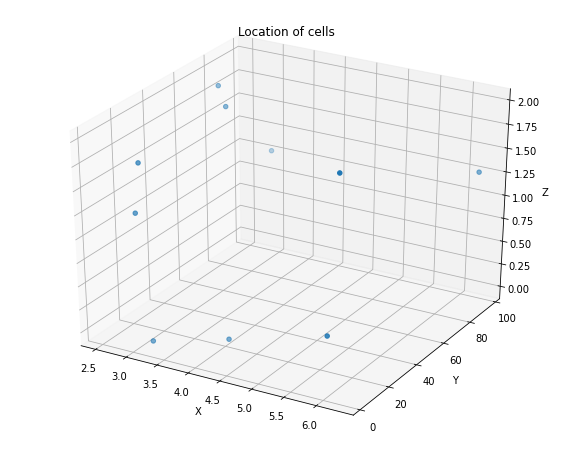

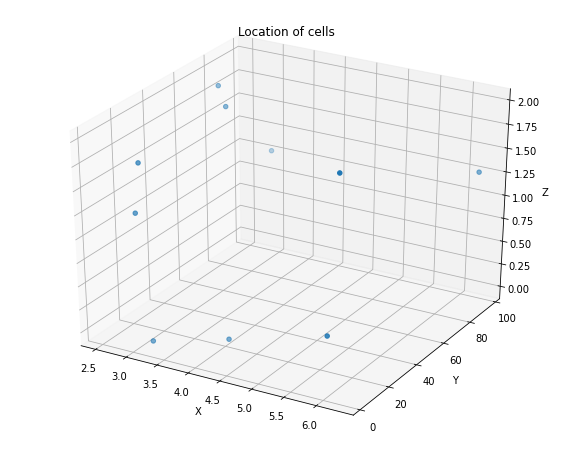

In [ ]:
LIF = LIF_Network(n_neurons=10, dimensions= [[0,10],[0,100],[0,2]])
LIF.p_conn = .4
LIF.random_conn()
plot_structure(LIF, conn = False)
plot_structure(LIF, conn = True, conn_target = [2])

A complete description of the connectivity can be plotted by calling plot_connectivity().

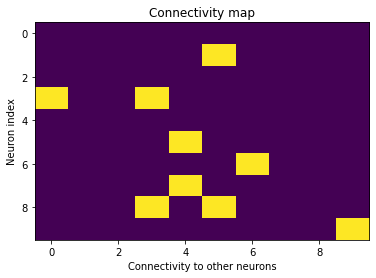

In [ ]:
plot_connectivity(LIF)

The simualtion can run for an alloted period of time, using LIF.simulate(). Here, we run the simulation for 100 milliseconds and plot the voltages for 10 of the neurons with plot_voltage(). Not that if you repeat this process, that time continues from the end of the last simualtion.

1 0 0


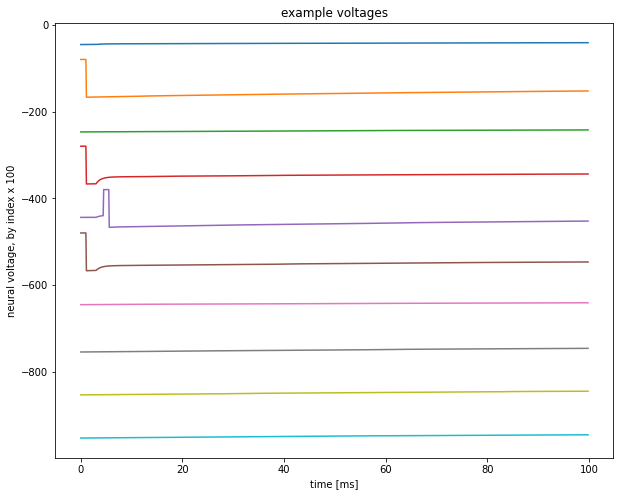

2 99.9999999999986 1000
3 99.9999999999986 1000


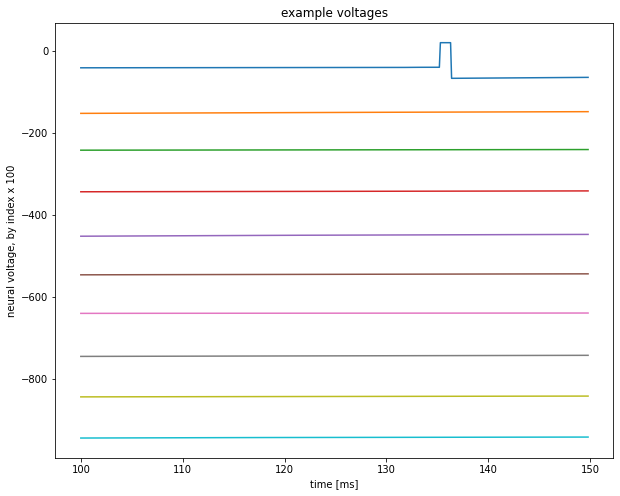

4 149.99999999999577 1500


In [ ]:
print(1, LIF.t, LIF.euler_step_idx)
simulation_results = LIF.simulate(sim_duration = 100)
plot_voltage(simulation_results, n = 10)
print(2, LIF.t, LIF.euler_step_idx)

print(3, LIF.t, LIF.euler_step_idx)
simulation_results = LIF.simulate(sim_duration = 50)
plot_voltage(simulation_results, n = 10)
print(4, LIF.t, LIF.euler_step_idx)

You can also view the spike train by calling the internal function LIF.spikeTrain().

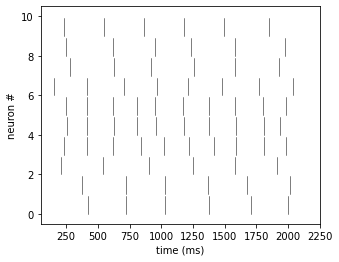

In [ ]:
h = LIF.simulate(sim_duration = 2000)
aa = LIF.spikeTrain(lookBack=2000,nNeurons=10,purge=False)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 
0, 1, 2, 3, 4, 5, 

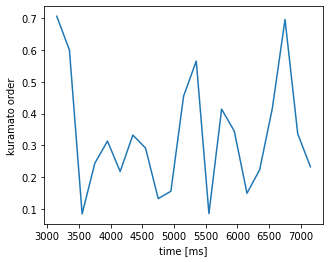

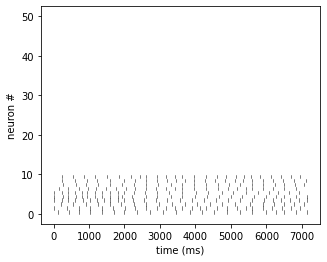

In [ ]:
cLIF = LIF_Network(n_neurons= 80)
LIF.p_conn = .1
LIF.random_conn()

t = []
o = []
trials = 15
LB = 800
h = LIF.simulate(sim_duration = LB)
for i in range(trials):
  print(i, end=", ")
  h = LIF.simulate(sim_duration = 200)
  ord = LIF.kuramato(period = 200, lookBack = LB)
  #print("K order was " + str(ord))
  plt.scatter(LIF.t,ord)
  t.append(LIF.t)
  o.append(ord)

print("")
LIF.network_conn = np.zeros([LIF.n_neurons,LIF.n_neurons])  
LIF.g_poisson = 3
for i in range(6):
  print(i, end=", ")
  h = LIF.simulate(sim_duration = 200)
  ord = LIF.kuramato(period = 200, lookBack = LB)
  #print("K order was " + str(ord))
  plt.scatter(LIF.t,ord)
  t.append(LIF.t)
  o.append(ord)

%matplotlib inline
fig = plt.figure()

plt.xlabel('time [ms]')
plt.ylabel('kuramato order')
plt.plot(t,o)
fig.set_size_inches(5, 4)
plt.show()

rr = LIF.spikeTrain(nNeurons=50,purge=False)

Starting...
Running Synchrony...
 ___________________
[███████████████████] Done!

Running desynchrony... 
 _________
[█████████] Done!


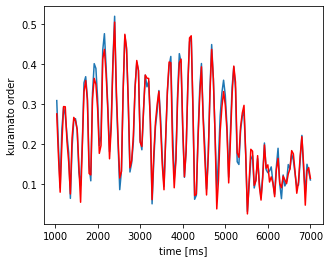

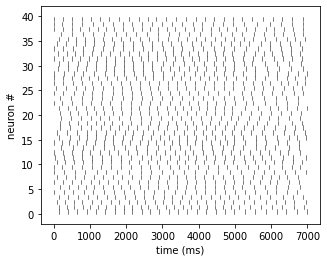

In [ ]:
LIF = LIF_Network(n_neurons= 200)
LIF.p_conn = .1
LIF.random_conn()

t = []
o = []
ov = []
splits = 5
trials = 20*splits
LB = 1000
LIF.simulate(sim_duration = LB)
print("Starting...")
print("Running Synchrony...")
print(" ",end = "")
print("_"*int(-1+trials/splits))
print("[", end="")
for i in range(trials):
  h = LIF.simulate(sim_duration = 200/splits)
  ordv = LIF.vect_kuramato(period = 200, lookBack = LB, r_cutoff = .1)
  ord = LIF.kuramato(period = 200, lookBack = LB)
  t.append(LIF.t)
  o.append(ord)
  ov.append(ordv)
  if i%splits == 0 and i > 1:
    print("█",end="")
print("] Done!")

print("")
LIF.network_conn = np.zeros([LIF.n_neurons,LIF.n_neurons])  
LIF.g_poisson = 3
trials = 10*splits

print("Running desynchrony... ")
print(" ",end = "")
print("_"*int(-1+trials/splits))
print("[", end="")
for i in range(trials):
  h = LIF.simulate(sim_duration = 200/splits)
  ordv = LIF.vect_kuramato(period = 200, lookBack = LB, r_cutoff = .1)
  ord = LIF.kuramato(period = 200, lookBack = LB)
  t.append(LIF.t)
  o.append(ord)
  ov.append(ordv)
  if i%splits == 0 and i > 1:
    print("█",end="")
print("] Done!")

%matplotlib inline
fig = plt.figure()

plt.xlabel('time [ms]')
plt.ylabel('kuramato order')
plt.plot(t,o)
plt.plot(t,ov,'red')
fig.set_size_inches(5, 4)
plt.show()

rr = LIF.spikeTrain(nNeurons=40,purge=False)

Starting...
Running Synchrony...
 ___________________
[███████████████████] Done!

Running desynchrony... 
 ___________________
[███████████████████] Done!


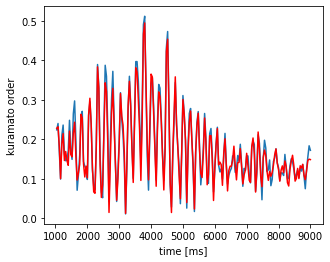

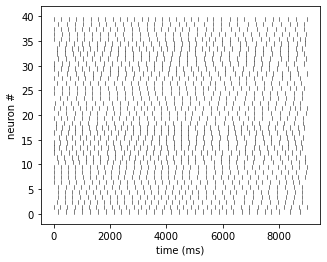

In [ ]:
LIF = LIF_Network(n_neurons= 200)
LIF.p_conn = .05
LIF.random_conn()
LIF.v_thr = np.random.randint(low=-50, high=-30,size=[LIF.n_neurons,])

t = []
o = []
ov = []
splits = 5
trials = 20*splits
LB = 1000
LIF.simulate(sim_duration = LB)
print("Starting...")
print("Running Synchrony...")
print(" ",end = "")
print("_"*int(-1+trials/splits))
print("[", end="")
for i in range(trials):
  h = LIF.simulate(sim_duration = 200/splits)
  ordv = LIF.vect_kuramato(period = 200, lookBack = LB, r_cutoff = .1)
  ord = LIF.kuramato(period = 200, lookBack = LB)
  t.append(LIF.t)
  o.append(ord)
  ov.append(ordv)
  if i%splits == 0 and i > 1:
    print("█",end="")
print("] Done!")

print("")
LIF.network_conn = np.zeros([LIF.n_neurons,LIF.n_neurons])  
LIF.g_poisson = 3
trials = 20*splits

print("Running desynchrony... ")
print(" ",end = "")
print("_"*int(-1+trials/splits))
print("[", end="")
for i in range(trials):
  h = LIF.simulate(sim_duration = 200/splits)
  ordv = LIF.vect_kuramato(period = 200, lookBack = LB, r_cutoff = .1)
  ord = LIF.kuramato(period = 200, lookBack = LB)
  t.append(LIF.t)
  o.append(ord)
  ov.append(ordv)
  if i%splits == 0 and i > 1:
    print("█",end="")
print("] Done!")

%matplotlib inline
fig = plt.figure()

plt.xlabel('time [ms]')
plt.ylabel('kuramato order')
plt.plot(t,o)
plt.plot(t,ov,'red')
fig.set_size_inches(5, 4)
plt.show()

rr = LIF.spikeTrain(nNeurons=40,purge=False)

We can view our STDP function by running assaySTDP() on the LIF class:

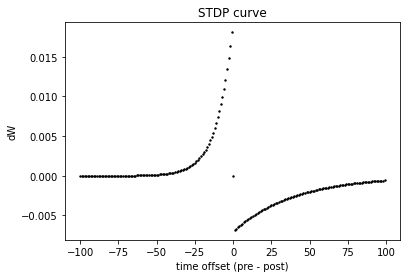

In [ ]:
LIF = LIF_Network(n_neurons=10)
LIF.assaySTDP()

Let's examine a very small network so we can observe the STDP events and line them up with spiking events. This will help us verify that the learning rule is working as we expect it to:

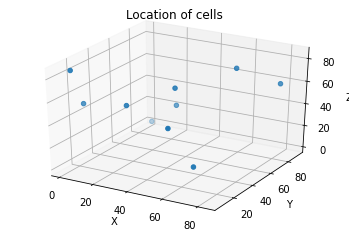

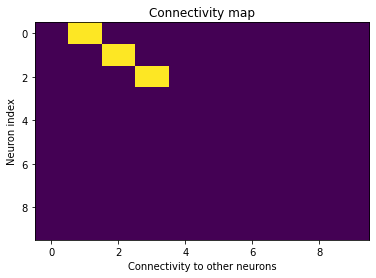

0.03


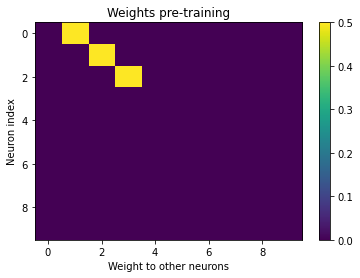

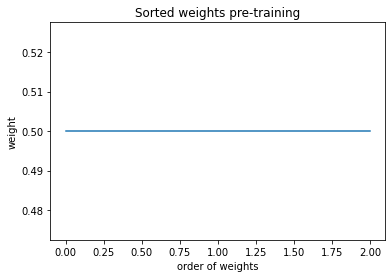

0.5


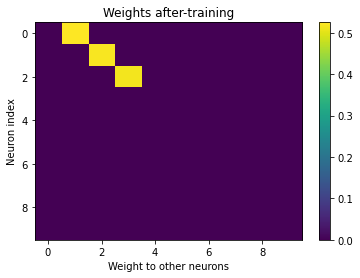

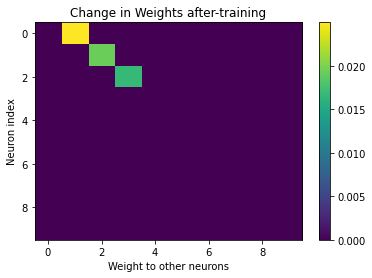

0.520364547788794


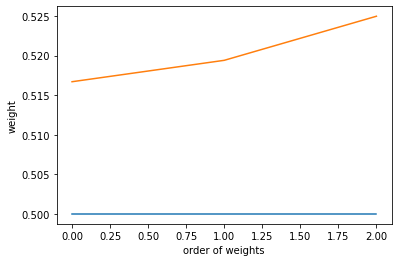

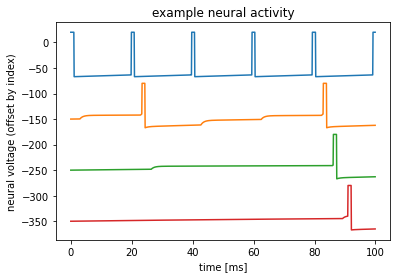

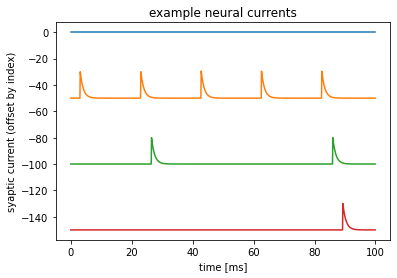

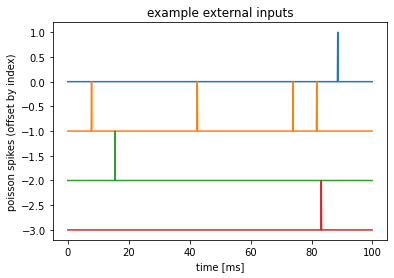

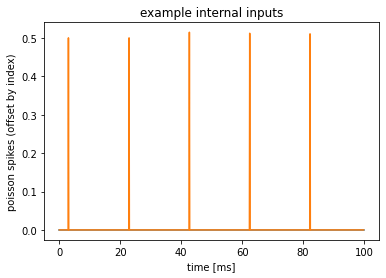

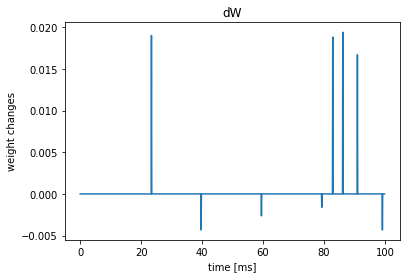

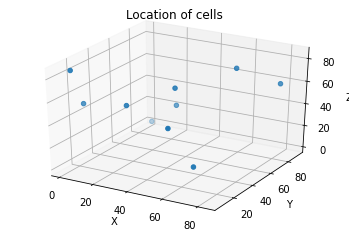

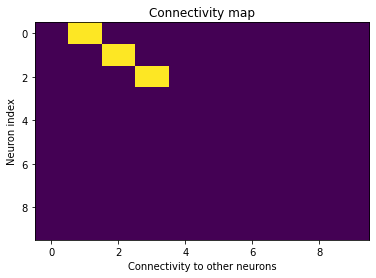

0.03


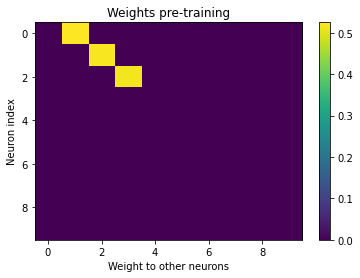

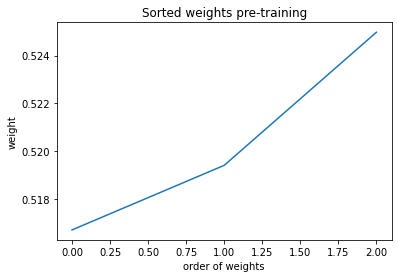

0.520364547788794


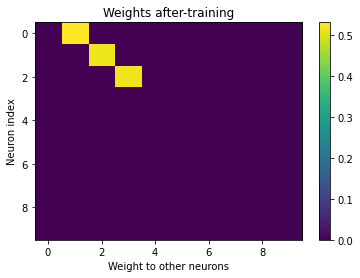

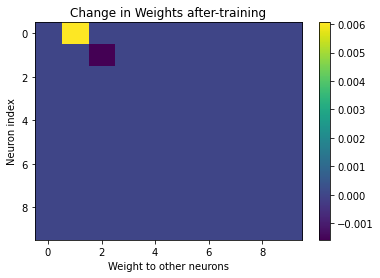

0.5218578295958638


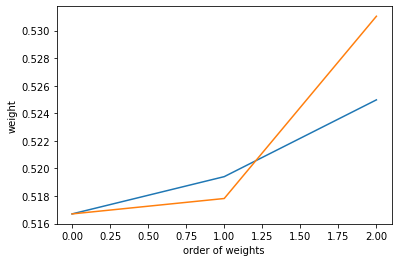

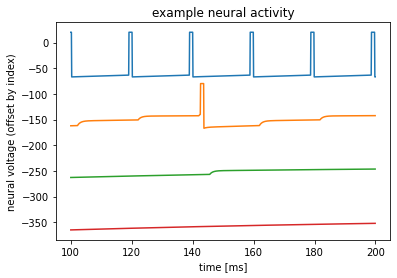

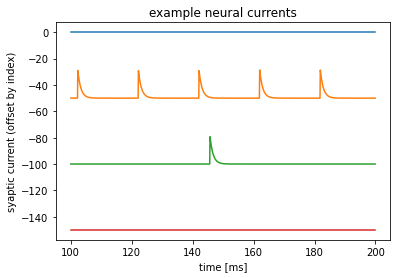

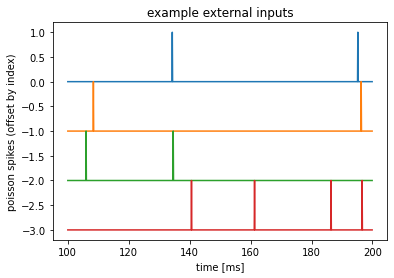

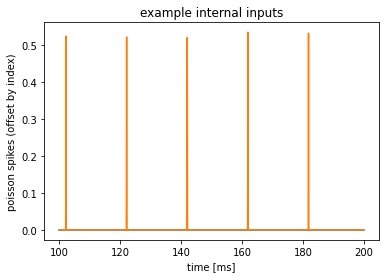

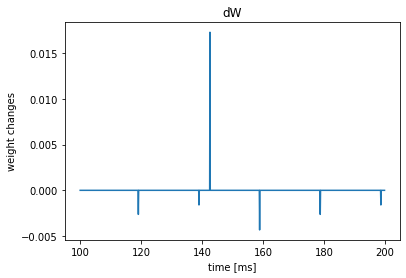

In [ ]:
LIF = LIF_Network(n_neurons=10)
LIF.v = LIF.v * 0 - 50
LIF.v_thr[0] = -70
LIF.v_rf_thr[0] = -65

LIF.network_conn = LIF.network_conn * 0
LIF.network_W = LIF.network_W * 0
for i in range(1,4):
  LIF.network_conn[i-1][i] = 1
  LIF.network_W[i-1][i] = .5


LIF.g_poisson = 0
print(LIF)

plotter(LIF,100,pN = 4)
plotter(LIF,100,pN = 4)

November 30th: Let's also look at spike trains. You can choose how far to look backwards "lookBack", how many neurons to plot, and whether or not you want to purge the spike records list.

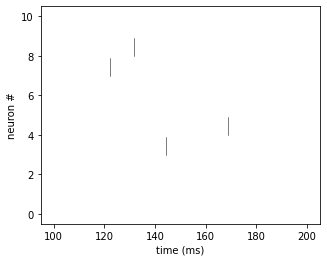

In [ ]:
LIF = LIF_Network(n_neurons=100)
h = LIF.simulate(sim_duration = 100)
h = LIF.simulate(sim_duration = 100)
[v,g,p,t,inp,dw] = h
h2 = LIF.spikeTrain(lookBack=100,nNeurons=10,purge=False)


Here is a very simply spike train. We only plotted the first 10, but you could plot all 100 if you want to.




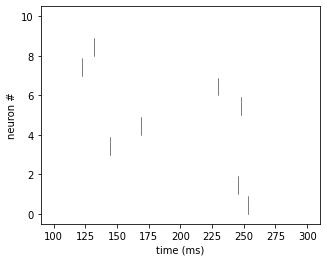

In [ ]:
h = LIF.simulate(sim_duration = 100)
[v,g,p,t,inp,dw] = h
h2 = LIF.spikeTrain(lookBack=200,nNeurons=10,purge=True)

Here we have looked back further than the amount of time we simulated. Everything before time = 200 should look familiar.

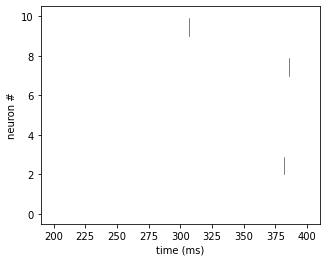

[[ 86.  300. ]
 [ 37.  301.8]
 [ 42.  302.4]
 [  9.  307.1]
 [ 62.  323.1]
 [ 61.  323.3]
 [ 31.  330.9]
 [ 18.  333.4]
 [ 54.  335.9]
 [ 83.  339.7]
 [ 51.  344.8]
 [ 65.  347.2]
 [ 26.  349.6]
 [ 47.  350.5]
 [ 10.  352.7]
 [ 11.  352.8]
 [ 34.  355.3]
 [ 89.  356.2]
 [ 93.  356.5]
 [ 85.  356.7]
 [ 40.  357.3]
 [ 57.  357.7]
 [ 35.  358.7]
 [ 30.  361.6]
 [ 71.  363. ]
 [ 80.  366.4]
 [ 88.  367.9]
 [ 25.  375. ]
 [  2.  381.7]
 [ 36.  382.1]
 [  7.  385.4]
 [ 43.  385.4]
 [ 79.  389. ]
 [ 46.  394.5]
 [ 87.  399.2]]


In [ ]:
h = LIF.simulate(sim_duration = 100)
[v,g,p,t,inp,dw] = h
h2 = LIF.spikeTrain(lookBack=200,nNeurons=10,purge=True)
print(h2)

Here, because we 'purged' the spike record, everything before the epoch has been forgotten. So be careful! The spike record is memory intensive, so it should be purged periodically, but you should save it somewhere. The function returns the spike record, as you can see.

Now let's see if we can observe synchrony in the spikes:

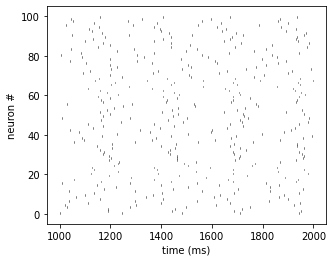

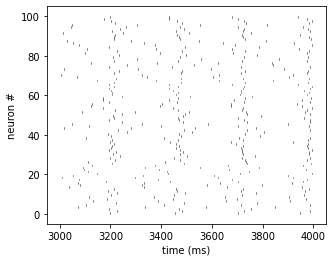

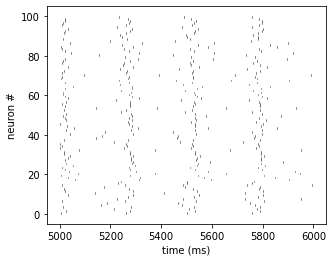

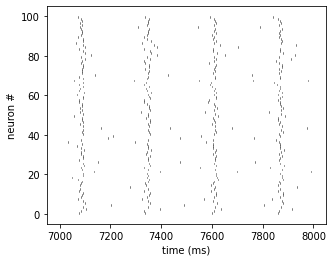

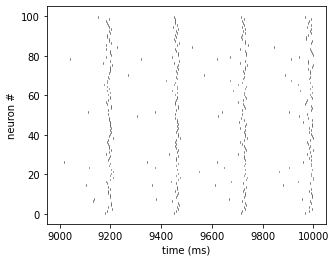

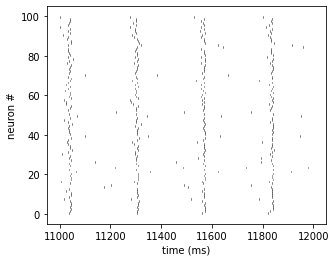

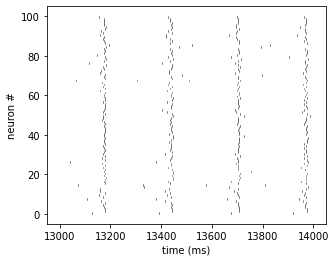

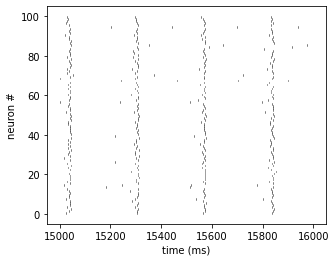

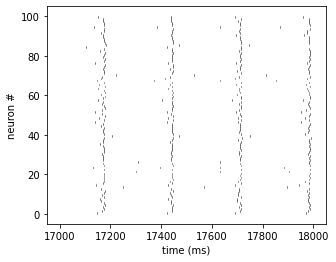

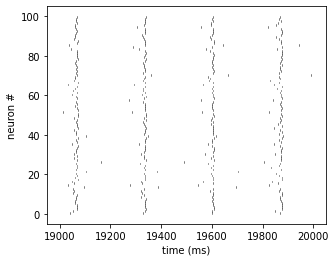

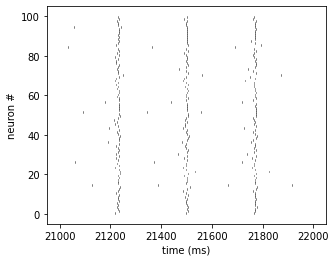

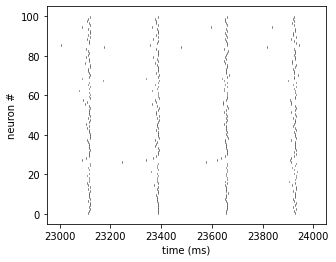

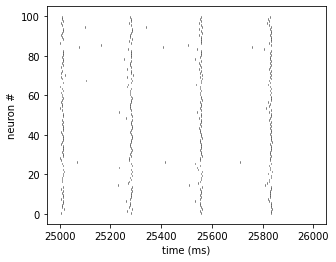

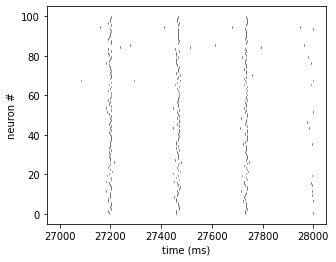

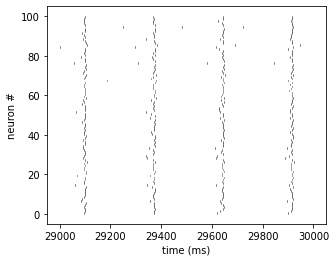

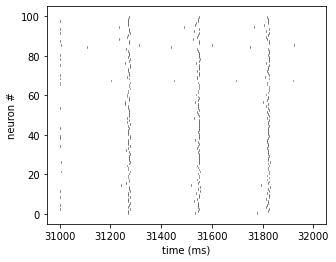

In [ ]:
LIF = LIF_Network(n_neurons=300)

h = LIF.simulate(sim_duration = 2000)
[v,g,p,t,inp,dw] = h
h2 = LIF.spikeTrain(lookBack=1000,nNeurons=100,purge=False)

for i in range(15):
  h = LIF.simulate(sim_duration = 2000)
  [v,g,p,t,inp,dw] = h
  h2 = LIF.spikeTrain(lookBack=1000,nNeurons=100,purge=False)
  LIF.kuramato()
  

Great!

That seems reasonable. Now lets see what happens when when the first neuron is weakly connected to all other neurons. It should generate some negative plasticity because it is constatly firing without causing spikes in the post-synaptic cells:

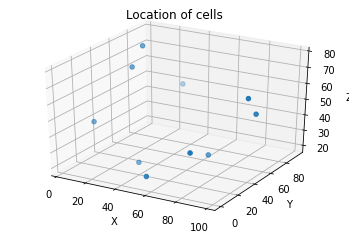

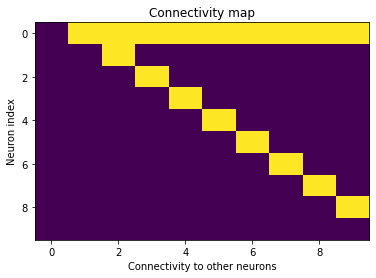

0.17


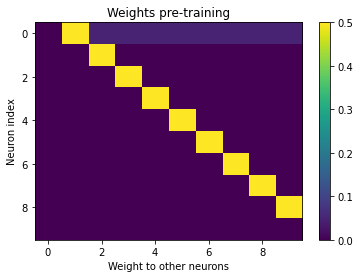

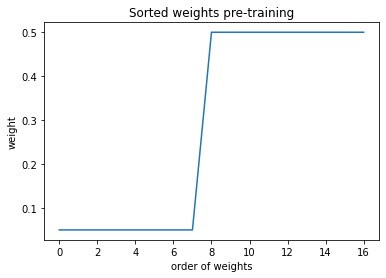

0.2882352941176471


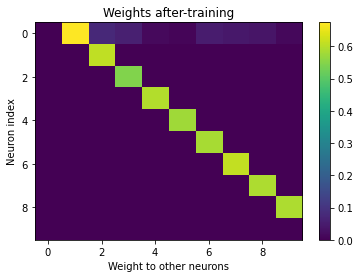

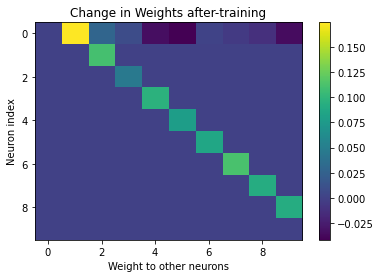

0.33536476727816744


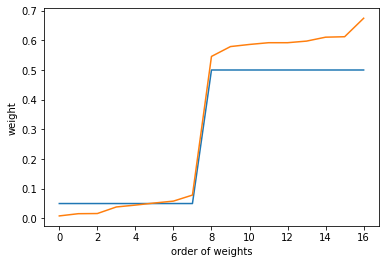

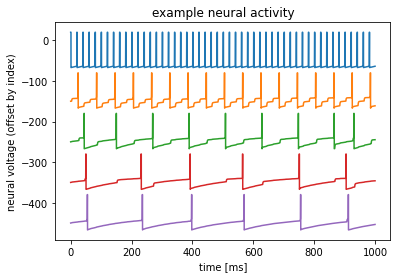

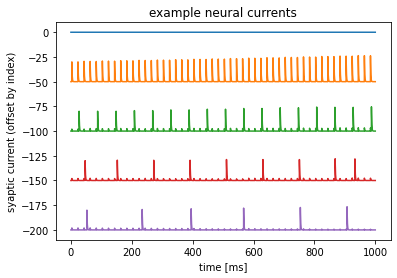

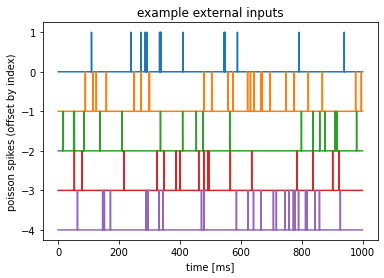

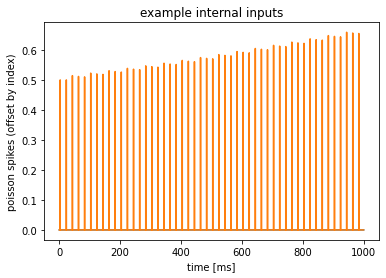

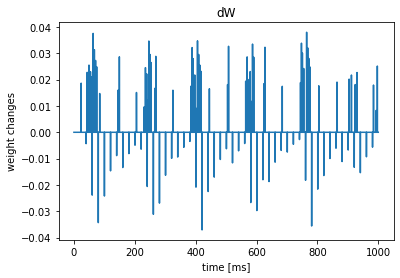

In [ ]:
LIF = LIF_Network(n_neurons=10)

LIF.v = LIF.v * 0 - 50
LIF.v_thr[0] = -70
LIF.v_rf_thr[0] = -65

LIF.network_conn = LIF.network_conn * 0
LIF.network_W = LIF.network_W * 0
for i in range(1,10):
  LIF.network_conn[i-1][i] = 1
  LIF.network_conn[0][i] = 1
  LIF.network_W[i-1][i] = .5
  LIF.network_W[0][i] = .05
LIF.network_W[0][1] = .5 
LIF.network_W[0][0] = 0
LIF.g_poisson = 0
print(LIF)

plotter(LIF,1000)

Great! We see a train of negative weight updates alligned with the firing of cell one. Let's now examine how Beta affects the learning curve, and then try out a LTP biased system vs a LTP biased system:

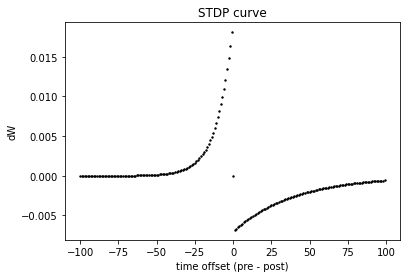

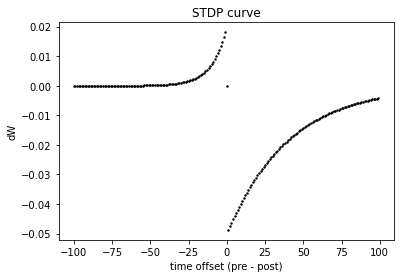

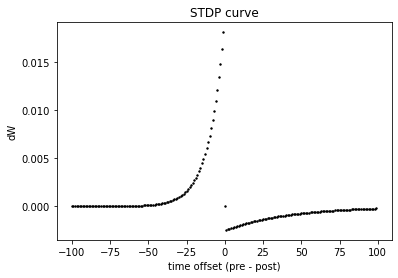

In [ ]:
LIF = LIF_Network(n_neurons=10)
LIF.assaySTDP()

LIF = LIF_Network(n_neurons=10)
LIF.stdp_beta = 10
LIF.assaySTDP()

LIF = LIF_Network(n_neurons=10)
LIF.stdp_beta = .5
LIF.assaySTDP()


We can see that beta affects the magnitude of LTP, so let's see what happens when beta is small:

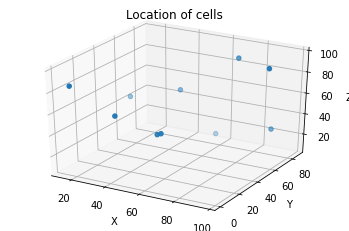

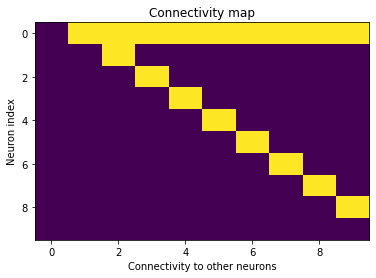

0.17


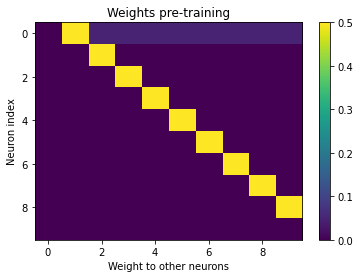

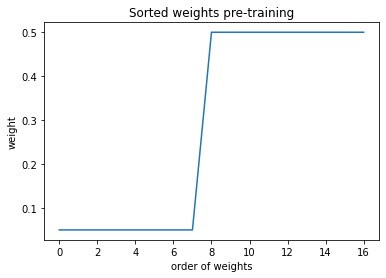

0.2882352941176471


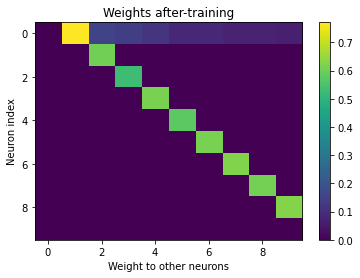

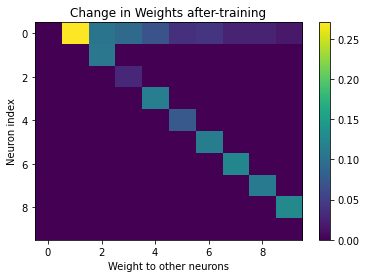

0.3758484767666252


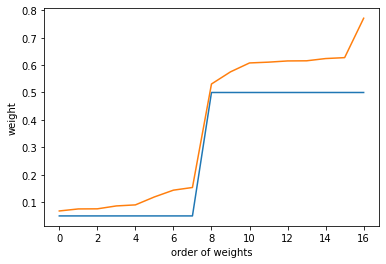

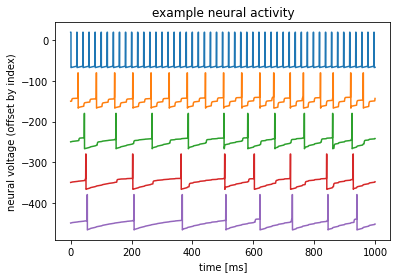

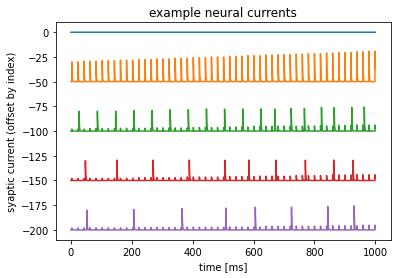

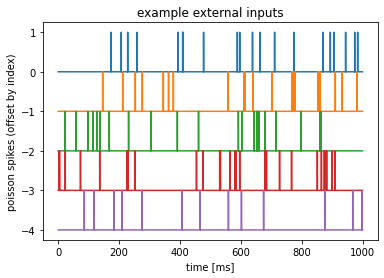

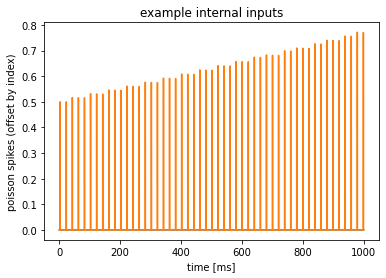

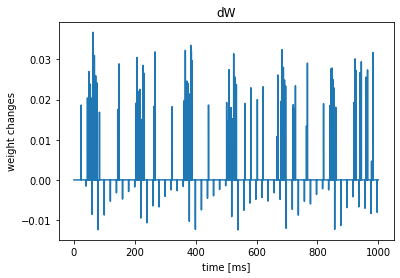

In [ ]:
LIF = LIF_Network(n_neurons=10)
LIF.stdp_beta = .5

LIF.v = LIF.v * 0 - 50
LIF.v_thr[0] = -70
LIF.v_rf_thr[0] = -65

LIF.network_conn = LIF.network_conn * 0
LIF.network_W = LIF.network_W * 0
for i in range(1,10):
  LIF.network_conn[i-1][i] = 1
  LIF.network_conn[0][i] = 1
  LIF.network_W[i-1][i] = .5
  LIF.network_W[0][i] = .05
  
LIF.network_W[0][1] = .5 
LIF.network_W[0][0] = 0
LIF.g_poisson = 0

plotter(LIF,1000)

Even though cell one is not contributing to firing in cells 2-10, it still undergoes LTP because of the learning bias.

Now let's see what happens when beta is large, meaning that LTD is favored:

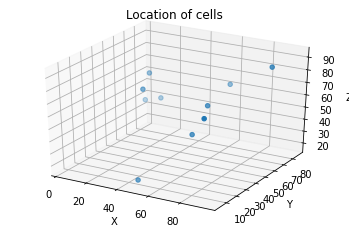

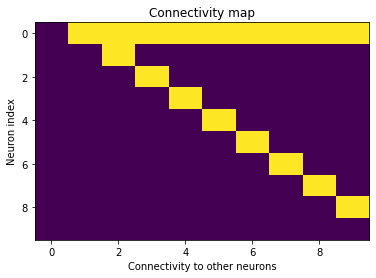

0.17


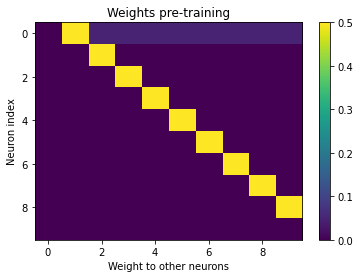

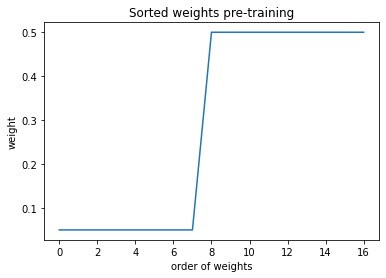

0.2882352941176471


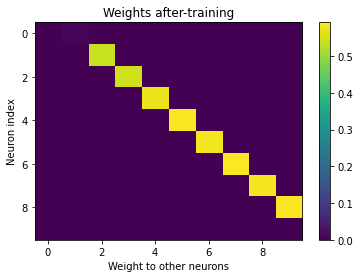

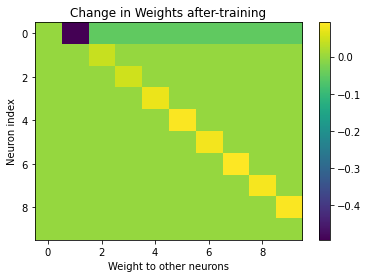

0.5119257287683738


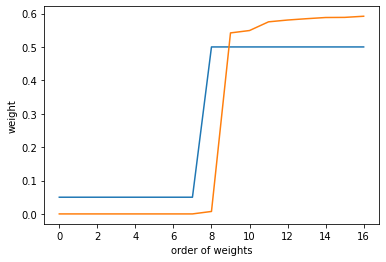

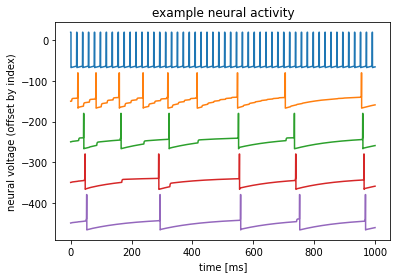

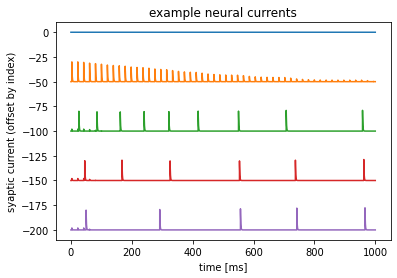

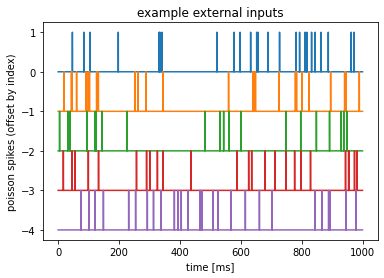

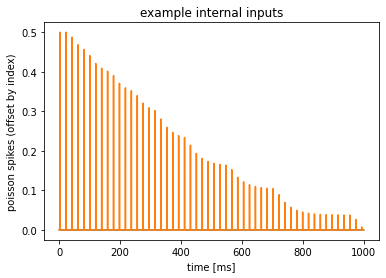

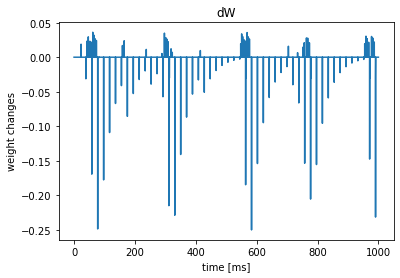

In [ ]:
LIF = LIF_Network(n_neurons=10)
LIF.stdp_beta = 10

LIF.v = LIF.v * 0 - 50
LIF.v_thr[0] = -70
LIF.v_rf_thr[0] = -65

LIF.network_conn = LIF.network_conn * 0
LIF.network_W = LIF.network_W * 0
for i in range(1,10):
  LIF.network_conn[i-1][i] = 1
  LIF.network_conn[0][i] = 1
  LIF.network_W[i-1][i] = .5
  LIF.network_W[0][i] = .05
  
LIF.network_W[0][1] = .5 
LIF.network_W[0][0] = 0
LIF.g_poisson = 0

plotter(LIF,1000)

Looks like we see a massive decrease in weights across the board, as expected.


Let's now use a more realistic network and run it for 20 seconds to see if we see an overall increase in weights.

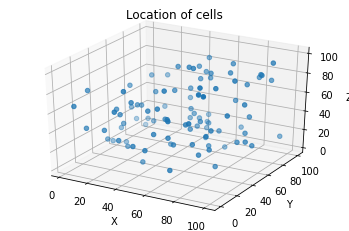

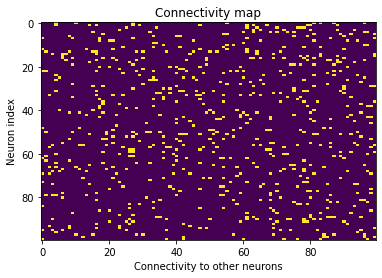

0.0682


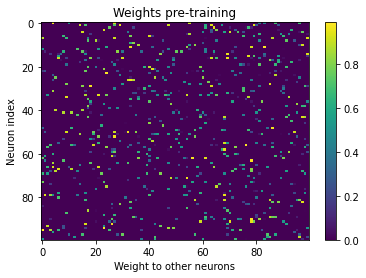

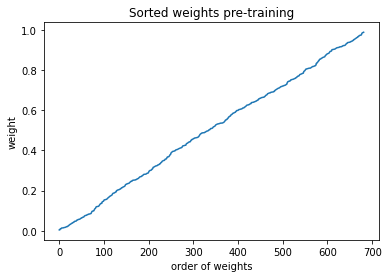

0.5


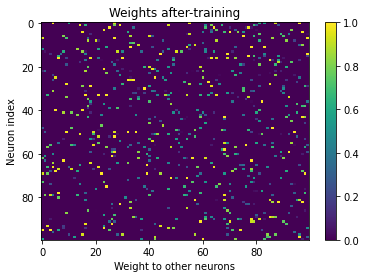

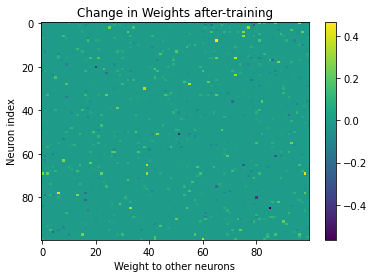

0.5524074645442697


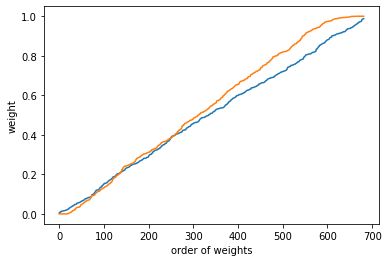

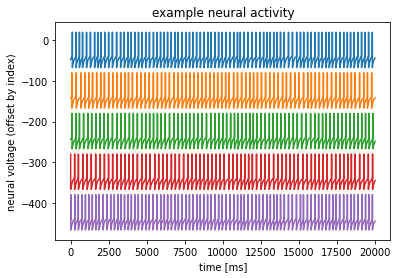

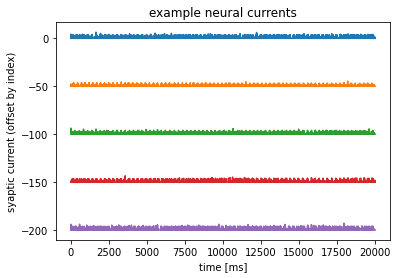

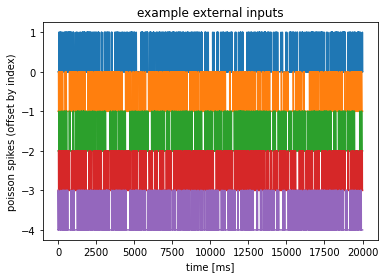

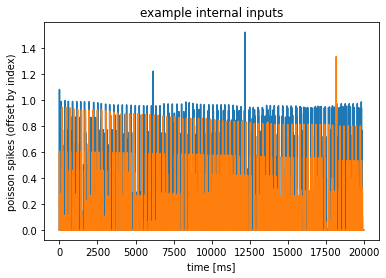

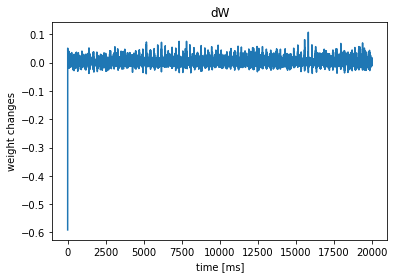

In [ ]:
LIF = LIF_Network(n_neurons= 100)

plotter(LIF,20000)

Seems like there is an overall trend towards increased weights between connected neurons, though some weakly connected neurons seem to be eliminating their weights too.

## Bistability of neural weights and synchrony

This model shows the different results for the weights and the orders of the neurons, both in graph and matrix form. The graphs show for each pixel fo the matrix and the behavior of the network over time. The matrix shows the results after a set period of time. Each pixel represents a network being stimulated with a different frequency and number of fingers (stimulation nodes). The colormap shows either the weights or the order of the neurons in each network.

In [8]:
#@title Plotting function 2
def plotter2(LIF:LIF_Network, 
             sim_duration, 
             I:"ndarray", 
             pN = 5):
  """

  Args: 
    LIF (LIF_Network): 
    sim_duration: 
    I (ndarray): 
    pN (int): Plot up to index (pN-1)-th neuron.

  NOTES (TONY): 
  - This function has been reduced to be used just for the simulation part.
  """

  h = LIF.simulate(sim_duration = sim_duration, 
                   epoch_current_input = I)
  # [v,g,p,t,inp,dw] = h
  W2 = LIF.network_W

  %matplotlib inline
  fig = plt.figure()
 
  # for i in range(pN):
  #   plt.plot(t, g[:,i]-i*50)
  # plt.xlabel('time [ms]')
  # plt.ylabel('syaptic current (offset by index)')
  # plt.title('example neural currents')
  # plt.show()

The following cell shows the results of the weight after every 2 seconds. The number of fingers is 10 and the frequency is 50. These parameters can be changed to see different results.

The results of this cell as it is are that the weights and the order increase overall logarthimically.

In [7]:
import functools
import time
from datetime import datetime

def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        tic = time.perf_counter()
        value = func(*args, **kwargs)
        toc = time.perf_counter()
        elapsed_time = toc - tic
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")
        return value
    return wrapper_timer

In [15]:
temp = np.array([])
temp.append(2)

AttributeError: ignored

In [ ]:
from scipy.ndimage import label
## Parameters (Change the following parameters to tune)
glove_stim_freq = 50 
n_finger = 10     # Number of fingers
n_neurons = 200   # Number of neurons
proba_conn = 0.2  # Probability of connection for finger-to-neuron 
glove_stim_duration = 20000
kuramato_period = 200
kuramato_lookBack = 1000

## Tracker Variables
x = []  # Tracker of variable o ---> ??? WHY?
track_post_sim_W_running_mean = np.array([])  # Tracker of running average of mean_W2
track_kuramato_order = np.array([])  # Tracker of Kuramato order 
track_kuramato_order_running_mean = np.array([]) # Tracker of running average of Kuramato order
o = 0   # Counter of the number-th run (why not just use the i from the for loop?)
track_post_sim_W_mean = np.array([])  # Holder of mean_W2
finger_stim = np.zeros([glove_stim_duration, n_finger])  # Tracker of finger stimulation over time
finger_neuron_conn = np.zeros([n_finger, n_neurons])     # Tracker of finger-Neuron connection stimulation
I = np.zeros([glove_stim_duration, n_neurons])           # Tracker of input to neuron (generated by glove stimulation)

## LIF instantiation
LIF = LIF_Network(n_neurons = n_neurons)
dt = LIF.dt  # Time step

## Stimulation variables
n_stim_per_step = int((glove_stim_duration/glove_stim_freq) / dt)    # Number of stimulation per Euler-step
stim_length_per_finger = int(glove_stim_duration/n_finger)           # Total stimulation length per finger - Assuming each finger receives equal stimulation? 

## Finger stimulation order
stim_order = np.arange(n_finger)
np.random.shuffle(stim_order)


## Generating finger to neuron stimulation, **based on probability**
##### NOTES (Tony) #####
##### Instead of using nested for-loops, directly generate a matrix for efficiency.
#####
for neuron_idx in range(n_neurons):
  for finger_idx in range(n_finger):
    if np.random.rand() < proba_conn:
      finger_neuron_conn[finger_idx, neuron_idx] = 1
## ==Faster way:==
# finger_neuron_conn = np.random.rand(n_finger, n_neurons)
# finger_neuron_conn = finger_neuron_conn - proba_conn
# finger_neuron_conn = (finger_neuron_conn <= 0)*1
# print(finger_neuron_conn)

## Update tracker to mark whether a neuron receives current from finger-stimulation
##### NOTES (Tony) ###### 
##### Correction made below, the original variable `num` and now named 
##### `n_stim_per_step` seems to have been confused leading to the `time_idx` to 
##### be jumped every `num` millisecond.
#####
# for finger_idx in range(0, n_finger):
#   for i in range(stim_length_per_finger * (finger_idx), 
#                  stim_length_per_finger * (finger_idx + 1), 
#                  n_stim_per_step): 
#     if i < glove_stim_duration:
#       finger_stim[i][stim_order[finger_idx]] = 1          # Update the finger stimulation tracker
#       I[i] [finger_neuron_conn[finger_idx,:]>0] = 1       # Based on finger_neuron_conn, marking whether a neuron receives input form the finger stimulation
## ==CORRECTION:==
for finger_idx in range(0, n_finger):
  for time_idx in range(stim_length_per_finger * (finger_idx), 
                 stim_length_per_finger * (finger_idx + 1)): 
    if time_idx < glove_stim_duration:
      finger_stim[time_idx][stim_order[finger_idx]] = 1          # Update the finger stimulation tracker
      I[time_idx][finger_neuron_conn[finger_idx,:]>0] = 1        # Based on finger_neuron_conn, marking whether a neuron receives input form the finger stimulation


## RUNNING GLOVE STIMULATION SIMULATION ##

##### NOTES (TONY) #####
##### I am going to assume that we are trying to see the snapshots of weight 
##### change throughout the glove stimulation to see how the weight changes 
##### things. Instead, the code below is running 240 full-on glove stimulations.
##### Observing the following cells, through `T*dt` it seems that the original 
##### intent was to offset `LIF_Network.stimulate()`'s turning of sim_duration
##### to Euler timesteps.
for i in range(240):
    ## Pre simulation network connection weights
    pre_sim_W = np.copy(LIF.network_W)
    pre_sim_W_mean = pre_sim_W[pre_sim_W>0].mean()

    ##### NOTES (Tony) ##### 
    ##### The second argument of plotter2 is sim_duration, feeding directly 
    ##### into the LIF_Network.simulate() argument. The original argument name
    ##### was ambiguous and thus may have led to the misunderstanding of 
    ##### LIF_Network.stimulate()'s second argument as number of Euler steps.
    # plotter2(LIF, glove_stim_duration*dt, I, pN = 5)  # plotter2 function is just being used to simulate
    ## CORRECTION
    # plotter2(LIF, glove_stim_duration, I, pN = 5)  # plotter2 function is just being used to simulate
    ## Replace plotter2 - (plotter2 is just running simulation, thus just run simulations directly on LIF)
    LIF.simulate(sim_duration = glove_stim_duration * dt, 
                 epoch_current_input = I)

    ## Post simulation network connection weights
    post_sim_W = LIF.network_W
    post_sim_W_mean = post_sim_W[post_sim_W > 0].mean()

    ## Network connection weight difference (post - pre)
    mean_W_diff = post_sim_W_mean - pre_sim_W_mean

    ## Calculate post simulation network connect (W) mean
    np.append(track_post_sim_W_mean, post_sim_W_mean)
    
    ## Calculate post simulation kuramato-order 
    kuramato_order = LIF.kuramato(period = kuramato_period, 
                                  lookBack = kuramato_lookBack)
    np.append(track_kuramato_order, kuramato_order)

    ## Calculate post simulation W running mean
    running_mean = (sum(track_post_sim_W_mean)
                    / len(track_post_sim_W_mean))
    np.append(track_post_sim_W_running_mean, running_mean)
    
    ## Calculate post simulation kuramato-order running mean
    running_kuramato = (sum(track_kuramato_order) 
                        / len(track_kuramato_order))
    np.append(track_kuramato_order_running_mean, running_kuramato)
    
    x.append(o)
    print(o)
    fig, ax = plt.subplots()
    ax.plot(x, track_post_sim_W_running_mean, color='green', label='Running W-mean')
    ax.plot(x, track_kuramato_order_running_mean, color='red', label='Kuramato Running mean')
    ax.legend()
    fig.show()
    # plt.plot(x,y, color="green")  # running average of mean_W2 vs euler-step
    # plt.plot(x,z, color="red")  # running average of Kuramato mean vs euler-step
    # plt.show()
    o=o+1  # increment the euler-step

This below cell runs when the frequency is 25 and the number of nodes is 45. It shows what the different trends in weights are at different times of waiting after the stimulation time.

The result is that the weights go up.:

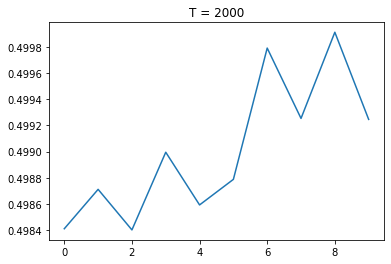

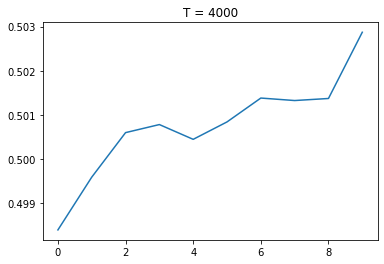

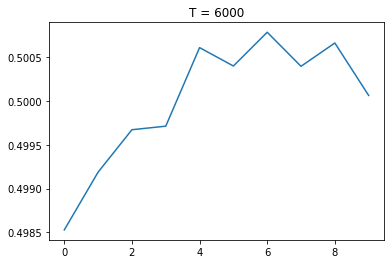

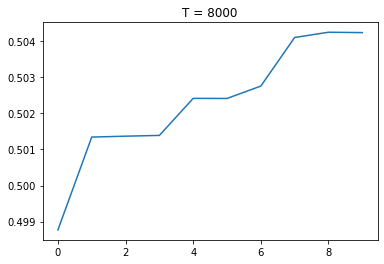

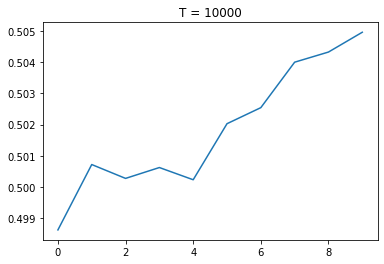

IndexError: ignored

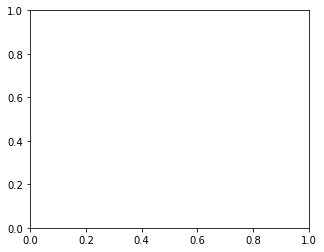

In [ ]:
LIF = LIF_Network(n_neurons=n)

o = 25
nof = 45
n = 200
d=[]
c=[]
dt = LIF.dt
T = 10000
I = np.zeros(shape = [T,n])


# add impulses to the outside actvity
stim = np.zeros([T,nof]) 
ConnStimNetwork = np.zeros([nof,n])
probability = 0.2


for c in range(n):
    for c2 in range(nof):
        Q = np.random.randint(0, high=99)
        if Q/100 < probability:
            ConnStimNetwork[c2,c] = 1
stimorder = np.arange(nof)
np.random.shuffle(stimorder)
freq = o
num = int((T/freq)/dt)
stim_length = 50000
for j in range(0,nof):
    for i in range(j*stim_length,(j+1)*stim_length,num): 
        if i<T:
            stim[i][stimorder[j]] = 1 
            I[i] [ConnStimNetwork[j,:]>0] = 1
for T in range(2000,20000,2000):
    fig = plt.figure()
    fig.set_size_inches(5, 4)
    ax = fig.add_subplot()
    for tr in range(1):
        LIF = LIF_Network(n_neurons=n)
        c=[]
        f=[]
        for simcount in range(10):
            W1 = np.copy(LIF.network_W)
            mean_W1 = np.mean(W1[W1 > 0].flatten())
            plotter2(LIF,T*dt, I, pN = 5)
            W2 = np.copy(LIF.network_W)
            mean_W2 = np.mean(W2[W1 > 0].flatten())
            c.append(mean_W2)
            f.append(simcount)
        plt.plot(f,c)
        plt.title("T = " + str(T))
        plt.show()

This below cell runs when the frequency is 25 and the number of nodes is 45. It shows what the different trends in weights are at different times of waiting after the stimulation time.

The result is that the weights go down.

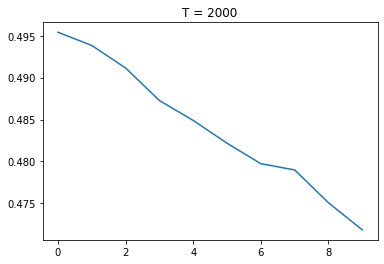

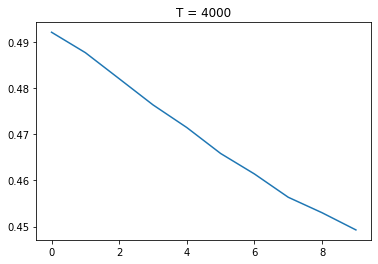

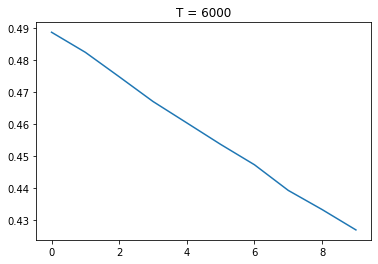

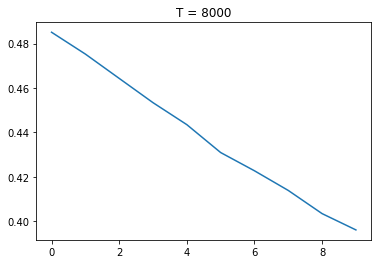

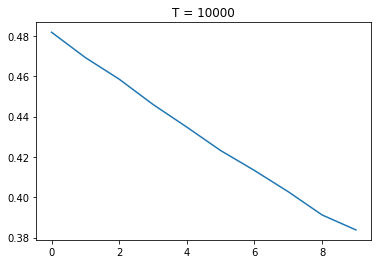

IndexError: ignored

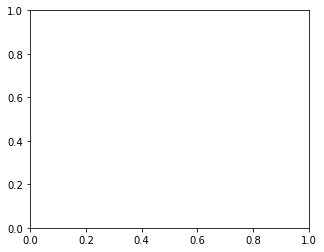

In [10]:
o = 25
nof = 45
n = 200
d=[]
c=[]
dt = LIF.dt
T = 10000
I = np.zeros(shape = [T,n])
# add impulses to the outside actvity
stim = np.zeros([T,nof]) 
ConnStimNetwork = np.zeros([nof,n])
probability = 0.2
for c in range(n):
    for c2 in range(nof):
        Q = np.random.randint(0, high=99)
        if Q/100 < probability:
            ConnStimNetwork[c2,c] = 1
stimorder = np.arange(nof)
np.random.shuffle(stimorder)
freq = o
num = int((T/freq)/dt)
stim_length = int(T/nof)
for j in range(0,nof):
    for i in range(j*stim_length,(j+1)*stim_length,num): 
        if i<T:
            stim[i][stimorder[j]] = 1 
            I[i] [ConnStimNetwork[j,:]>0] = 1
for T in range(2000,20000,2000):
    fig = plt.figure()
    fig.set_size_inches(5, 4)
    ax = fig.add_subplot()
    for tr in range(1):
        LIF = LIF_Network(n_neurons=n)
        c=[]
        f=[]
        for simcount in range(10):
            W1 = np.copy(LIF.network_W)
            mean_W1 = np.mean(W1[W1 > 0].flatten())
            plotter2(LIF,T*dt, I, pN = 5)
            W2 = np.copy(LIF.network_W)
            mean_W2 = np.mean(W2[W1 > 0].flatten())
            c.append(mean_W2)
            f.append(simcount)
        plt.plot(f,c)
        plt.title("T = " + str(T))
        plt.show()

This below cell is running the stimulation to produce a matrix of weights after the stimulation. The time waiting after the stimulatino is 10 seconds, while the stimulation length itself is 1 second. The number of neurons is 200. 

From this cell, we get a graph showing that the weights of the neurons decreases at frequencies between 10 and 70 Hz, while it increases above 70-80 Hz.

In [ ]:
from datetime import datetime
LIF = LIF_Network(n_neurons=2)
# datetime object containing current date and time
now = datetime.now()
print("now =", now) 
results_matrix = np.zeros([10,25])
ii = -1
jj = -1
hj=0
# Experiment parameters
T = 100000
stim_length = 10000
n = 200
dt = LIF.dt
probability = 0.2
print("starting...")
for k in range(1,51,5):
    ii = ii+1
    jj=-1
    nof = k
    print("trial " + str(ii) + " of " + str(60/2))
    for o in range(1, 251, 10):
        jj = jj+1
        meanW=[]
        for i in range(3):
            LIF = LIF_Network(n_neurons=n)
            I = np.zeros(shape = [T,n])
            # add impulses to the outside actvity
            stim = np.zeros([T,nof]) 
            ConnStimNetwork = np.zeros([nof,n])
            for c in range(n):
                for c2 in range(nof):
                    Q = np.random.randint(0, high=99)
                    if Q/100 < probability:
                        ConnStimNetwork[c2,c] = 1
            stimorder = np.arange(nof)
            np.random.shuffle(stimorder)
            freq = o
            num = int(1000/freq/dt)
            held_i = 0    
            while held_i<T:
                for j in range(nof):
                    for i in range(0,stim_length,num): 
                        if i+held_i<T:
                            stim[i+held_i][stimorder[j]] = 1 
                            I[i+held_i] [ConnStimNetwork[j,:]>0] = 1              
                    held_i = held_i + stim_length
            W1 = np.copy(LIF.network_W)
            mean_W1 = np.mean(W1[W1 > 0].flatten())
            plotter2(LIF,T*dt, I, pN = 5)
            W2 = np.copy(LIF.network_W)
            mean_W2 = np.mean(W2[W1 > 0].flatten())
            meanW.append(mean_W2)
            print("elapsed time for trial was: ", datetime.now()-now)
            now = datetime.now()
            print("frequency: " + str(o) +" produced mean weight of: " + str(mean_W2))
        results_matrix[ii][jj]=np.mean(meanW)
        %matplotlib inline
        fig = plt.figure()
        fig.set_size_inches(5, 4)
        ax = fig.add_subplot()
        plt.imshow(np.flipud(results_matrix),aspect='equal',interpolation='none', vmin=np.min(results_matrix[np.nonzero(results_matrix)]), vmax=np.max(results_matrix[np.nonzero(results_matrix)]), cmap='jet')
    
        plt.colorbar()
        ax.set_aspect('auto')
        plt.ylabel('number of nodes')
        plt.xlabel('frequency')
        plt.show()

This below cell is running the stimulation to produce a matrix of the order of the neuron system after the stimulation. The time waiting after the stimulatino is 15 seconds, while the stimulation length itself is 1 second. The number of neurons is 200. 

From this cell, we get a graph showing that the order of the neurons approximately decreases at frequencies between 10 and 70 Hz, while it increases above 70-80 Hz, similar to the weights. However, it is slightly more random than the weights.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


now = 2023-02-05 04:02:09.343835
starting...
trial 0 of 30.0
elapsed time for trial was:  0:01:12.203953
frequency: 1 produced mean weight of: 0.4726678812118426
elapsed time for trial was:  0:01:12.283395
frequency: 1 produced mean weight of: 0.6485526386621191
elapsed time for trial was:  0:01:15.991336
frequency: 1 produced mean weight of: 0.5347971331812841
elapsed time for trial was:  0:01:13.197767
frequency: 1 produced mean weight of: 0.6494144400532623
elapsed time for trial was:  0:01:12.892281
frequency: 1 produced mean weight of: 0.6212446828535976


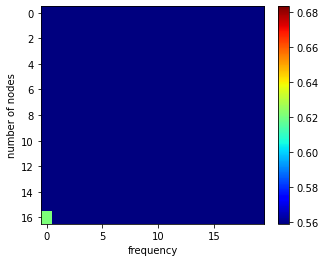

elapsed time for trial was:  0:01:25.782209
frequency: 11 produced mean weight of: 0.19567191398146994
elapsed time for trial was:  0:01:26.913690
frequency: 11 produced mean weight of: 0.2879960872536124
elapsed time for trial was:  0:01:25.680676
frequency: 11 produced mean weight of: 0.32573912475207645
elapsed time for trial was:  0:01:30.683786
frequency: 11 produced mean weight of: 0.28046623522889824
elapsed time for trial was:  0:01:33.442011
frequency: 11 produced mean weight of: 0.12758959551155624


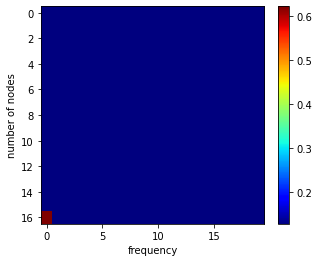

elapsed time for trial was:  0:01:45.987980
frequency: 21 produced mean weight of: 0.15992622237333348
elapsed time for trial was:  0:01:52.716540
frequency: 21 produced mean weight of: 0.2209286900113902
elapsed time for trial was:  0:01:55.599663
frequency: 21 produced mean weight of: 0.3219658526248137
elapsed time for trial was:  0:01:50.225079
frequency: 21 produced mean weight of: 0.07873062974285853
elapsed time for trial was:  0:01:52.994335
frequency: 21 produced mean weight of: 0.15321753945444838


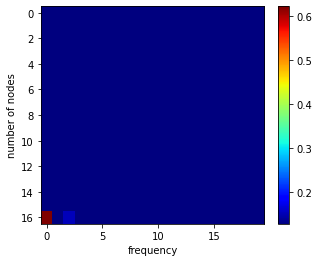

elapsed time for trial was:  0:02:17.746127
frequency: 31 produced mean weight of: 0.2796142918365837
elapsed time for trial was:  0:02:27.873889
frequency: 31 produced mean weight of: 0.28622408750731937
elapsed time for trial was:  0:02:27.271861
frequency: 31 produced mean weight of: 0.26203862589531385
elapsed time for trial was:  0:02:25.124702
frequency: 31 produced mean weight of: 0.2533081747371526
elapsed time for trial was:  0:02:04.235921
frequency: 31 produced mean weight of: 0.22092487496117533


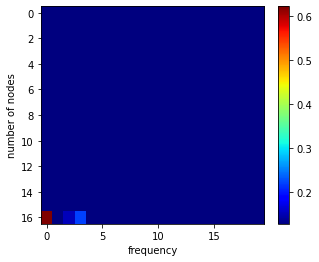

elapsed time for trial was:  0:02:41.296111
frequency: 41 produced mean weight of: 0.32213535043726305
elapsed time for trial was:  0:02:48.911283
frequency: 41 produced mean weight of: 0.30801509346913863
elapsed time for trial was:  0:02:48.022898
frequency: 41 produced mean weight of: 0.22941726850630592
elapsed time for trial was:  0:02:47.710427
frequency: 41 produced mean weight of: 0.2771969361244555
elapsed time for trial was:  0:02:44.677389
frequency: 41 produced mean weight of: 0.3648837895683458


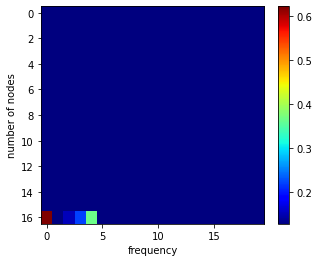

elapsed time for trial was:  0:02:51.198602
frequency: 51 produced mean weight of: 0.1653944030325749
elapsed time for trial was:  0:02:48.280810
frequency: 51 produced mean weight of: 0.2906877828329896
elapsed time for trial was:  0:02:53.234806
frequency: 51 produced mean weight of: 0.1919662974031546
elapsed time for trial was:  0:02:50.591179
frequency: 51 produced mean weight of: 0.23750985163423455
elapsed time for trial was:  0:03:02.318438
frequency: 51 produced mean weight of: 0.17673025037374052


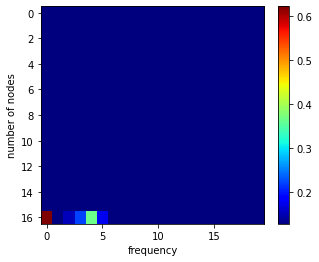

elapsed time for trial was:  0:03:57.228830
frequency: 61 produced mean weight of: 0.27897269360649657
elapsed time for trial was:  0:03:09.024225
frequency: 61 produced mean weight of: 0.21482259045772625
elapsed time for trial was:  0:03:10.749681
frequency: 61 produced mean weight of: 0.1790317066962271
elapsed time for trial was:  0:03:14.219185
frequency: 61 produced mean weight of: 0.24537832377013039
elapsed time for trial was:  0:03:05.181306
frequency: 61 produced mean weight of: 0.10318962548897084


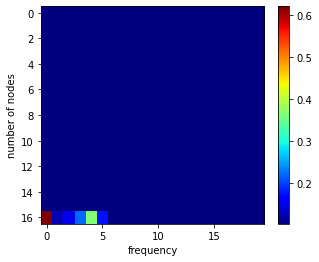

elapsed time for trial was:  0:03:59.992655
frequency: 71 produced mean weight of: 0.32593578788565203
elapsed time for trial was:  0:03:27.793311
frequency: 71 produced mean weight of: 0.29519226973064866
elapsed time for trial was:  0:03:15.040150
frequency: 71 produced mean weight of: 0.01214745904777846
elapsed time for trial was:  0:04:27.915714
frequency: 71 produced mean weight of: 0.38165739399814974
elapsed time for trial was:  0:03:41.518863
frequency: 71 produced mean weight of: 0.1907517662419637


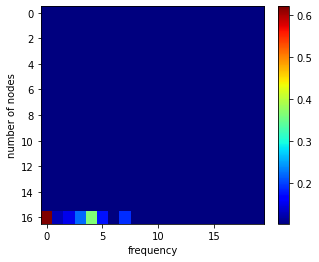

elapsed time for trial was:  0:03:15.930424
frequency: 81 produced mean weight of: 0.4024330277708388
elapsed time for trial was:  0:03:58.937630
frequency: 81 produced mean weight of: 0.3751637078286156
elapsed time for trial was:  0:03:40.776840
frequency: 81 produced mean weight of: 0.30251447027326617
elapsed time for trial was:  0:03:52.017172
frequency: 81 produced mean weight of: 0.24378947022181716
elapsed time for trial was:  0:04:07.406492
frequency: 81 produced mean weight of: 0.26615404369804224


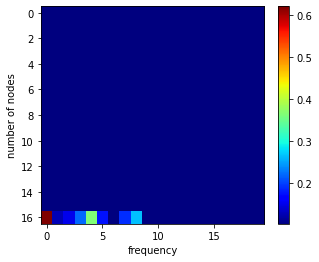

elapsed time for trial was:  0:03:48.707340
frequency: 91 produced mean weight of: 0.32589613605808393
elapsed time for trial was:  0:03:41.035635
frequency: 91 produced mean weight of: 0.2116271991684314
elapsed time for trial was:  0:04:32.352548
frequency: 91 produced mean weight of: 0.2000200725659775
elapsed time for trial was:  0:03:17.481093
frequency: 91 produced mean weight of: 0.3639686015390663
elapsed time for trial was:  0:04:28.498533
frequency: 91 produced mean weight of: 0.2474739017093308


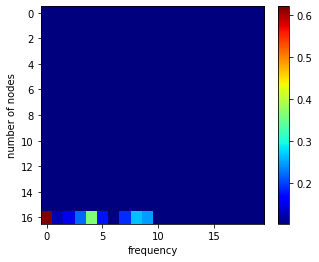

elapsed time for trial was:  0:04:22.320030
frequency: 101 produced mean weight of: 0.4136062325855869
elapsed time for trial was:  0:04:36.722907
frequency: 101 produced mean weight of: 0.2632878729812458
elapsed time for trial was:  0:04:12.267460
frequency: 101 produced mean weight of: 0.3657340724045818
elapsed time for trial was:  0:03:40.038769
frequency: 101 produced mean weight of: 0.29928065134808624
elapsed time for trial was:  0:03:52.975742
frequency: 101 produced mean weight of: 0.2758875384733241


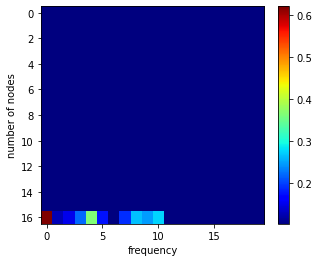

elapsed time for trial was:  0:04:47.891340
frequency: 111 produced mean weight of: 0.3415170226368692
elapsed time for trial was:  0:04:05.946732
frequency: 111 produced mean weight of: 0.3944595263154269
elapsed time for trial was:  0:04:51.597612
frequency: 111 produced mean weight of: 0.31851635253286026
elapsed time for trial was:  0:04:05.684027
frequency: 111 produced mean weight of: 0.31469236980211546
elapsed time for trial was:  0:04:09.771211
frequency: 111 produced mean weight of: 0.3684347401530873


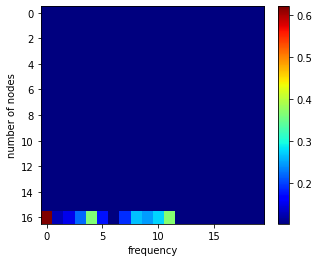

elapsed time for trial was:  0:04:13.601545
frequency: 121 produced mean weight of: 0.3711728031468243
elapsed time for trial was:  0:04:12.308465
frequency: 121 produced mean weight of: 0.3429261674429876
elapsed time for trial was:  0:04:15.873272
frequency: 121 produced mean weight of: 0.24143350485278514
elapsed time for trial was:  0:03:41.125898
frequency: 121 produced mean weight of: 0.295739143818506
elapsed time for trial was:  0:04:11.253302
frequency: 121 produced mean weight of: 0.39473268671163336


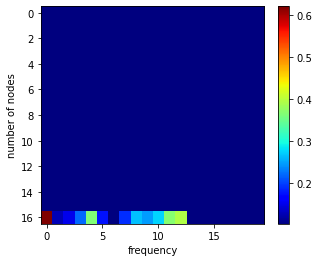

elapsed time for trial was:  0:05:49.317484
frequency: 131 produced mean weight of: 0.43699526927045795
elapsed time for trial was:  0:04:28.086530
frequency: 131 produced mean weight of: 0.34697946727705536
elapsed time for trial was:  0:04:56.989052
frequency: 131 produced mean weight of: 0.36404209044057007
elapsed time for trial was:  0:05:11.111208
frequency: 131 produced mean weight of: 0.3602350169888015
elapsed time for trial was:  0:04:18.526599
frequency: 131 produced mean weight of: 0.296228287621967


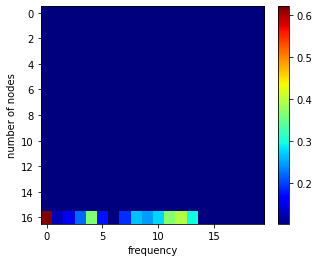

elapsed time for trial was:  0:04:29.581045
frequency: 141 produced mean weight of: 0.3153417273307101
elapsed time for trial was:  0:05:43.559193
frequency: 141 produced mean weight of: 0.3069257512517743
elapsed time for trial was:  0:04:31.177624
frequency: 141 produced mean weight of: 0.19046728247437036
elapsed time for trial was:  0:04:33.849478
frequency: 141 produced mean weight of: 0.3325775838537743
elapsed time for trial was:  0:04:46.038119
frequency: 141 produced mean weight of: 0.3936925319697219


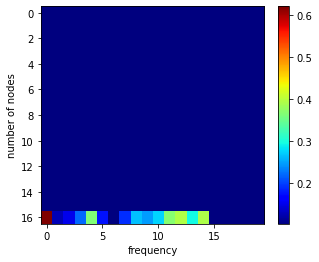

elapsed time for trial was:  0:04:21.071938
frequency: 151 produced mean weight of: 0.303131223975365
elapsed time for trial was:  0:04:37.801652
frequency: 151 produced mean weight of: 0.2394093738065123
elapsed time for trial was:  0:04:36.053745
frequency: 151 produced mean weight of: 0.2959665222627599
elapsed time for trial was:  0:05:26.722082
frequency: 151 produced mean weight of: 0.2816094905334358
elapsed time for trial was:  0:05:00.423002
frequency: 151 produced mean weight of: 0.4157145653727462


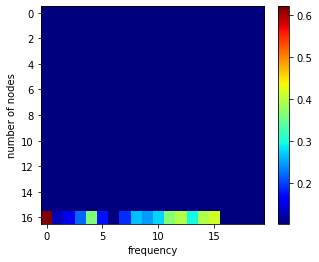

elapsed time for trial was:  0:05:52.256511
frequency: 161 produced mean weight of: 0.19227330955940297
elapsed time for trial was:  0:04:36.856502
frequency: 161 produced mean weight of: 0.3870374939454603
elapsed time for trial was:  0:05:31.017110
frequency: 161 produced mean weight of: 0.4541992806863022
elapsed time for trial was:  0:05:42.795487
frequency: 161 produced mean weight of: 0.38187019450342846
elapsed time for trial was:  0:04:59.911389
frequency: 161 produced mean weight of: 0.21941913250017805


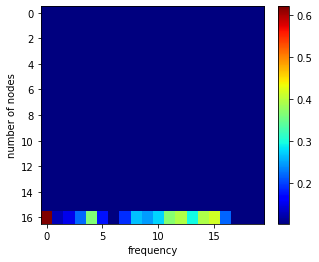

elapsed time for trial was:  0:04:34.690347
frequency: 171 produced mean weight of: 0.33314597163146914
elapsed time for trial was:  0:05:31.828008
frequency: 171 produced mean weight of: 0.37502671183064584
elapsed time for trial was:  0:05:09.121343
frequency: 171 produced mean weight of: 0.24734354348466941
elapsed time for trial was:  0:04:12.684636
frequency: 171 produced mean weight of: 0.25708863484318983
elapsed time for trial was:  0:05:05.182420
frequency: 171 produced mean weight of: 0.26195928657959916


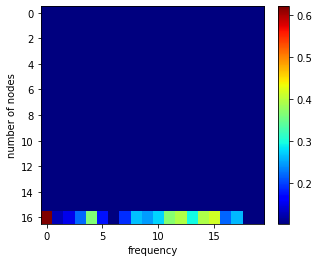

elapsed time for trial was:  0:06:48.617512
frequency: 181 produced mean weight of: 0.32537979671704886
elapsed time for trial was:  0:05:16.308126
frequency: 181 produced mean weight of: 0.19815511973132227
elapsed time for trial was:  0:04:41.644125
frequency: 181 produced mean weight of: 0.22118837804208877
elapsed time for trial was:  0:05:10.230443
frequency: 181 produced mean weight of: 0.32552392027576293
elapsed time for trial was:  0:05:27.720682
frequency: 181 produced mean weight of: 0.33568208327307436


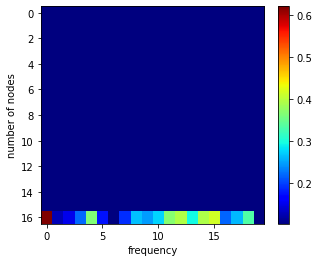

elapsed time for trial was:  0:04:20.560878
frequency: 191 produced mean weight of: 0.32124186645007613


In [ ]:
from datetime import datetime
LIF = LIF_Network(n_neurons=2)
# datetime object containing current date and time
now = datetime.now()
print("now =", now) 
results_matrix = np.zeros([17,20])
ii = -1
jj = -1
hj=0
# Experiment parameters
T = 150000
stim_length = 10000
n = 200
dt = LIF.dt
probability = 0.2
print("starting...")
for k in range(1,51,3):
    ii = ii+1
    jj=-1
    nof = k
    print("trial " + str(ii) + " of " + str(60/2))
    for o in range(1, 201, 10):
        jj = jj+1
        meanW=[]
        for i in range(5):
            LIF = LIF_Network(n_neurons=n)
            I = np.zeros(shape = [T,n])
            # add impulses to the outside actvity
            stim = np.zeros([T,nof]) 
            ConnStimNetwork = np.zeros([nof,n])
            for c in range(n):
                for c2 in range(nof):
                    Q = np.random.randint(0, high=99)
                    if Q/100 < probability:
                        ConnStimNetwork[c2,c] = 1
            stimorder = np.arange(nof)
            np.random.shuffle(stimorder)
            freq = o
            num = int(1000/freq/dt)
            held_i = 0    
            while held_i<T:
                for j in range(nof):
                    for i in range(0,stim_length,num): 
                        if i+held_i<T:
                            stim[i+held_i][stimorder[j]] = 1 
                            I[i+held_i] [ConnStimNetwork[j,:]>0] = 1              
                    held_i = held_i + stim_length
            W1 = np.copy(LIF.network_W)
            mean_W1 = np.mean(W1[W1 > 0].flatten())
            
            plotter2(LIF,T*dt, I, pN = 5)
            order = LIF.kuramato(period = 200, lookBack = 1000)
            W2 = np.copy(LIF.network_W)
            mean_W2 = np.mean(W2[W1 > 0].flatten())
            meanW.append(mean_W2)
            print("elapsed time for trial was: ", datetime.now()-now)
            now = datetime.now()
            print("frequency: " + str(o) +" produced mean weight of: " + str(order))
        results_matrix[ii][jj]=np.mean(order)
        %matplotlib inline
        fig = plt.figure()
        fig.set_size_inches(5, 4)
        ax = fig.add_subplot()
        plt.imshow(np.flipud(results_matrix),aspect='equal',interpolation='none', vmin=np.min(results_matrix[np.nonzero(results_matrix)]), vmax=np.max(results_matrix[np.nonzero(results_matrix)]), cmap='jet')
        plt.colorbar()
        ax.set_aspect('auto')
        plt.ylabel('number of nodes')
        plt.xlabel('frequency')
        plt.show()

# Citations
<a name="citations">
</a>



Kromer JA, Khaledi-Nasab A, Tass PA. Impact of number of stimulation sites on long-lasting desynchronization effects of coordinated reset stimulation. Chaos. 2020 Aug;30(8):083134. doi: 10.1063/5.0015196. PMID: 32872805.
